# Proyek Analisis Data: E-Commerce Public Dataset

#### Nama  : Fransisca Angelita Dwi Nugraheni

#### Email : sisca1122211@gmail.com

#### ID Dicoding : siscaangelitaa

### Menentukan Pertanyaan Bisnis

1. Apa kategori produk yang paling sering terjual?
2. Di mana saja persebaran lokasi pelanggan dengan konsentrasi pembelian tertinggi dan dan penjual dengan volume transaksi tertinggi?
3. Kapan pelanggan biasanya melakukan pembelian?
4. Apakah biaya pengiriman meningkat seiring dengan bertambahnya berat produk?
5. Bagaimana tingkat kepuasan pelanggan berdasarkan metode pembayaran?

### Menyiapkan semua library yang dibutuhkan

In [1]:
import os

IS_LOCAL = True  

if IS_LOCAL:
    PATH = os.path.join(os.path.expanduser("~"), "Documents", "E-Commerce Public Dataset")
else:
    PATH = "../input"

print(os.listdir(PATH))

['customers_dataset.csv', 'geolocation_dataset.csv', 'orders_dataset.csv', 'order_items_dataset.csv', 'order_payments_dataset.csv', 'order_reviews_dataset.csv', 'products_dataset.csv', 'product_category_name_translation.csv', 'sellers_dataset.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

## Data Wrangling

### Gathering Data

#### Customers Dataset

In [3]:
customers_df = pd.read_csv(PATH+"/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Dataset ini memuat informasi tentang pelanggan di platform e-commerce.
* customer_id berisi ID unik untuk setiap pelanggan. Ini adalah pengenal utama untuk masing-masing pelanggan dalam sistem e-commerce.

* customer_unique_id berisi ID unik yang digunakan untuk mengidentifikasi pelanggan secara global. ID ini biasanya digunakan untuk menghindari duplikasi dan memastikan bahwa setiap pelanggan dikenali secara unik di seluruh sistem.

* customer_zip_code_prefix berisi awalan kode pos pelanggan.

* customer_city berisi nama kota tempat pelanggan tinggal. Ini memberikan informasi tentang lokasi geografis pelanggan dalam konteks kota.

* customer_state berisi singkatan kode negara bagian tempat pelanggan tinggal.

#### Geolocation Dataset

In [4]:
geolocation_df = pd.read_csv(PATH+"/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Dataset ini memuat informasi tentang geolokasi.
* geolocation_zip_code_prefix berisi awalan kode pos untuk lokasi tertentu di Brazil. Ini berguna untuk mengidentifikasi lokasi umum berdasarkan kode pos.

* geolocation_lat berisi informasi garis lintang (latitude) dari lokasi tertentu di Brazil. Garis lintang adalah koordinat geografis yang menentukan posisi utara-selatan suatu titik di permukaan bumi.

* geolocation_lng berisi informasi garis bujur (longitude) dari lokasi tertentu. Garis bujur adalah koordinat geografis yang menentukan posisi timur-barat suatu titik di permukaan bumi.

* geolocation_city berisi nama kota di Brazil. Ini berguna untuk mengaitkan koordinat geografis dengan lokasi kota.

* geolocation_state berisi nama negara bagian atau provinsi di brazil. Ini berguna untuk mengaitkan koordinat geografis dengan lokasi negara bagian atau provinsi.

#### Orders Dataset

In [5]:
orders_df = pd.read_csv(PATH+"/orders_dataset.csv")
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [6]:
unique_order_status = orders_df['order_status'].unique()
print("Kategori unik pada kolom 'order_status':")
print(unique_order_status)

Kategori unik pada kolom 'order_status':
['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


Dataset ini memuat informasi tentang pesanan yang dilakukan oleh pelanggan di platform e-commerce.
* order_id berisi ID unik yang mengidentifikasi setiap pesanan yang dibuat oleh pelanggan. Setiap pesanan memiliki order_id yang berbeda.
* customer_id berisi ID unik yang mengidentifikasi pelanggan yang membuat pesanan. 
* order_status berisi status pesanan saat ini, yang menunjukkan di mana pesanan berada dalam proses pemenuhan. Status ini dapat mencakup berbagai tahap, seperti:
    
    created: Pesanan telah dibuat.
    
    processing: Pesanan sedang diproses oleh sistem.
    
    invoiced: Faktur untuk pesanan telah dibuat. Faktur ini sebagai bukti transaksi.

    approved: Pesanan telah disetujui.

    shipped: Pesanan telah dikirim.

    delivered: Pesanan telah diterima oleh pelanggan.

    canceled: Pesanan telah dibatalkan.
    
    unavailable: Pesanan tidak dapat dipenuhi karena masalah seperti kekurangan stok atau masalah pembayaran.
   
    
* order_purchase_timestamp berisi tanggal dan waktu ketika pesanan dibuat oleh pelanggan.
* order_approved_at berisi tanggal dan waktu ketika pesanan disetujui oleh sistem atau oleh penjual.
* order_delivered_carrier_date berisi tanggal dan waktu ketika pesanan diserahkan kepada tempat pengiriman.
* order_delivered_customer_date berisi tanggal dan waktu ketika pesanan diterima oleh pelanggan.
* order_estimated_delivery_date berisi tanggal yang diestimasi untuk pengiriman pesanan kepada pelanggan.

#### Order Items Dataset

In [7]:
order_items_df = pd.read_csv(PATH+"/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Dataset ini memuat informasi tentang item-item yang dipesan dalam setiap pesanan

* order_id berisi ID unik untuk setiap pesanan. Ini adalah pengenal utama yang mengaitkan setiap item dalam dataset dengan pesanan tertentu.

* order_item_id berisi ID unik untuk setiap item dalam pesanan. Misalnya dalam satu pesanan, mungkin ada beberapa item. Sehingga  kolom ini membedakan item-item tersebut dalam satu pesanan yang sama.

* product_id berisi ID unik untuk setiap produk yang dipesan. Ini mengidentifikasi produk tertentu dalam katalog produk.

* seller_id berisi ID unik untuk setiap penjual yang menjual produk. Ini mengidentifikasi penjual yang bertanggung jawab atas produk tertentu dalam pesanan.

* shipping_limit_date berisi tanggal dan waktu batas pengiriman untuk item tersebut. 

* price berisi harga item yang dipesan. Ini adalah harga jual produk tanpa biaya pengiriman.

* freight_value berisi biaya pengiriman untuk item tersebut.

#### Order Payments Dataset

In [8]:
order_payments_df = pd.read_csv(PATH+"/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Dataset ini memuat informasi pembayaran yang terkait dengan setiap pesanan

* order_id berisi ID unik untuk setiap pesanan. Ini mengaitkan pembayaran dengan pesanan tertentu dalam dataset lainnya.

* payment_sequential berisi urutan pembayaran untuk pesanan tertentu. Misalnya jika pembayaran dilakukan dengan beberapa cara atau dalam beberapa cicilan.

* payment_type berisi jenis pembayaran yang digunakan diantaranya yaitu 'credit_card' (kartu kredit), 'boleto' (slip pembayaran), 'voucher' (voucher), dan 'debit_card' (kartu debit).

* payment_installments berisi banyaknya cicilan yang digunakan untuk menyelesaikan pembayaran pesanan.

* payment_value berisi jumlah uang yang dibayarkan untuk pesanan tersebut.

#### Order Reviews Dataset

In [9]:
order_reviews_df = pd.read_csv(PATH+"/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Dataset ini berisi informasi tentang ulasan yang diberikan oleh pelanggan terhadap pesanan mereka
* review_id berisi ID unik untuk setiap ulasan. Ini adalah pengenal utama untuk setiap entri ulasan.

* order_id berisi ID unik untuk setiap pesanan yang diulas. Ini mengaitkan ulasan dengan pesanan tertentu dalam dataset lainnya.

* review_score berisi skor ulasan yang diberikan oleh pelanggan dalam bentuk angka dari 1 hingga 5.

* review_comment_title berisi judul ulasan yang diberikan oleh pelanggan. Ini adalah headline dari komentar ulasan.

* review_comment_message berisi pesan ulasan atau komentar lengkap yang diberikan oleh pelanggan.

* review_creation_date berisi tanggal ketika ulasan dibuat oleh pelanggan. Ini menunjukkan kapan ulasan tersebut ditulis.

* review_answer_timestamp berisi waktu ketika ulasan tersebut dijawab atau diproses oleh sistem.

#### Products Dataset

In [10]:
products_df = pd.read_csv(PATH+"/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Dataset ini memuat informasi tentang produk yang dijual di platform e-commerce

* product_id berisi ID unik untuk setiap produk. Ini adalah pengenal utama untuk setiap produk dalam dataset.

* product_category_name berisi nama kategori produk.

* product_name_lenght berisi panjang nama produk dalam deskripsi, diukur dalam jumlah karakter.

* product_description_lenght berisi panjang deskripsi produk, diukur dalam jumlah karakter

* product_photos_qty berisi banyak gambar yang tersedia untuk produk dalam katalog.

* product_weight_g berisi berat produk dalam gram

* product_length_cm berisi panjang produk dalam sentimeter

* product_height_cm berisi tinggi produk dalam sentimeter

* product_width_cm berisi lebar produk dalam sentimeter

#### Product Category Name Translation

In [11]:
category_translation = pd.read_csv(PATH+"/product_category_name_translation.csv")
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Dataset ini berisi informasi tentang terjemahan nama kategori produk dari bahasa resmi di Brazil yaitu bahasa Portugis ke bahasa Inggris. 

* product_category_name berisi nama kategori produk dalam bahasa Portugis.

* product_category_name_english berisi terjemahan dari nama kategori produk ke dalam bahasa Inggris

#### Sellers Dataset

In [12]:
sellers_df = pd.read_csv(PATH+"/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Dataset ini berisi informasi tentang penjual yang menawarkan produk di platform e-commerce.

* seller_id berisi ID unik untuk setiap penjual. Ini adalah pengenal utama untuk setiap penjual dalam sistem e-commerce.

* seller_zip_code_prefix berisi awalan kode pos untuk lokasi penjual di Brazil

* seller_city berisi nama kota tempat penjual beroperasi. 

* seller_state berisi singkatan kode negara bagian tempat penjual berada di Brazil. 

### Assessing Data

#### Memeriksa customers_df

In [13]:
print("customers_df memiliki",customers_df.shape[0],"baris dan", customers_df.shape[1], "kolom")

customers_df memiliki 99441 baris dan 5 kolom


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
total_rows_customers_df = customers_df.shape[0]
missing_values_customers_df = customers_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_customers_df = (missing_values_customers_df / total_rows_customers_df) * 100

dtypes_customers_df = customers_df[missing_values_customers_df.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_customers_df = pd.DataFrame({
    'Missing Values': missing_values_customers_df,    
    'Data Type': dtypes_customers_df,     
    'Missing Percentage': missing_percentage_customers_df[missing_values_customers_df.index]
})
display(HTML(info_customers_df.to_html()))

,Missing Values,Data Type,Missing Percentage
customer_id,0,object,0.0
customer_unique_id,0,object,0.0
customer_zip_code_prefix,0,int64,0.0
customer_city,0,object,0.0
customer_state,0,object,0.0


In [16]:
print("Banyak duplikat pada customers_df:", customers_df.duplicated().sum())

Banyak duplikat pada customers_df: 0


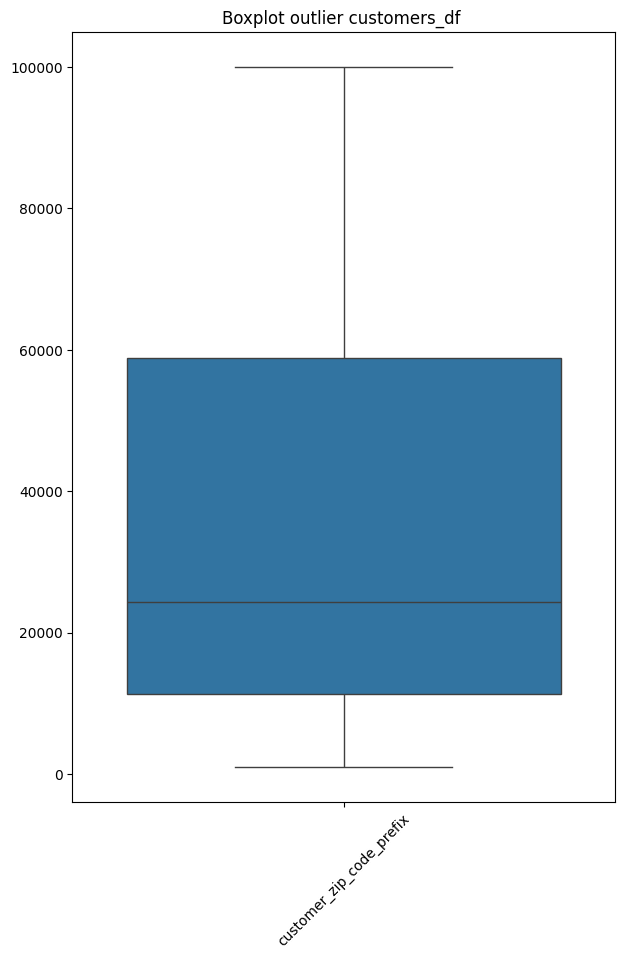

In [17]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(7, 10))
sns.boxplot(data=customers_df)
plt.title('Boxplot outlier customers_df ')
plt.xticks(rotation=45)  
plt.show()

In [18]:
def count_outliers(column):
    if column.dtype in ['int64', 'float64']:  # Hanya untuk kolom numerik
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Hitung jumlah nilai di luar batas bawah dan atas
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return len(outliers)
    else:
        return 0  # Kolom non-numerik tidak dihitung

In [19]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_customers_df = customers_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada customers_df:")
print(outlier_customers_df)

Jumlah outlier setiap kolom pada customers_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


#### Memeriksa geolocation_df

In [20]:
print("geolocation_df memiliki",geolocation_df.shape[0],"baris dan", geolocation_df.shape[1], "kolom")

geolocation_df memiliki 1000163 baris dan 5 kolom


In [21]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [22]:
total_rows_geolocation_df = geolocation_df.shape[0]
missing_values_geolocation_df = geolocation_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_geolocation_df = (missing_values_geolocation_df / total_rows_geolocation_df) * 100

dtypes_geolocation_df = geolocation_df[missing_values_geolocation_df.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_geolocation_df = pd.DataFrame({
    'Missing Values': missing_values_geolocation_df,    
    'Data Type': dtypes_geolocation_df,     
    'Missing Percentage': missing_percentage_geolocation_df[missing_values_geolocation_df.index]
})
display(HTML(info_geolocation_df.to_html()))

,Missing Values,Data Type,Missing Percentage
geolocation_zip_code_prefix,0,int64,0.0
geolocation_lat,0,float64,0.0
geolocation_lng,0,float64,0.0
geolocation_city,0,object,0.0
geolocation_state,0,object,0.0


In [23]:
print("Banyak duplikat pada geolocation_df:", geolocation_df.duplicated().sum())

Banyak duplikat pada geolocation_df: 261831


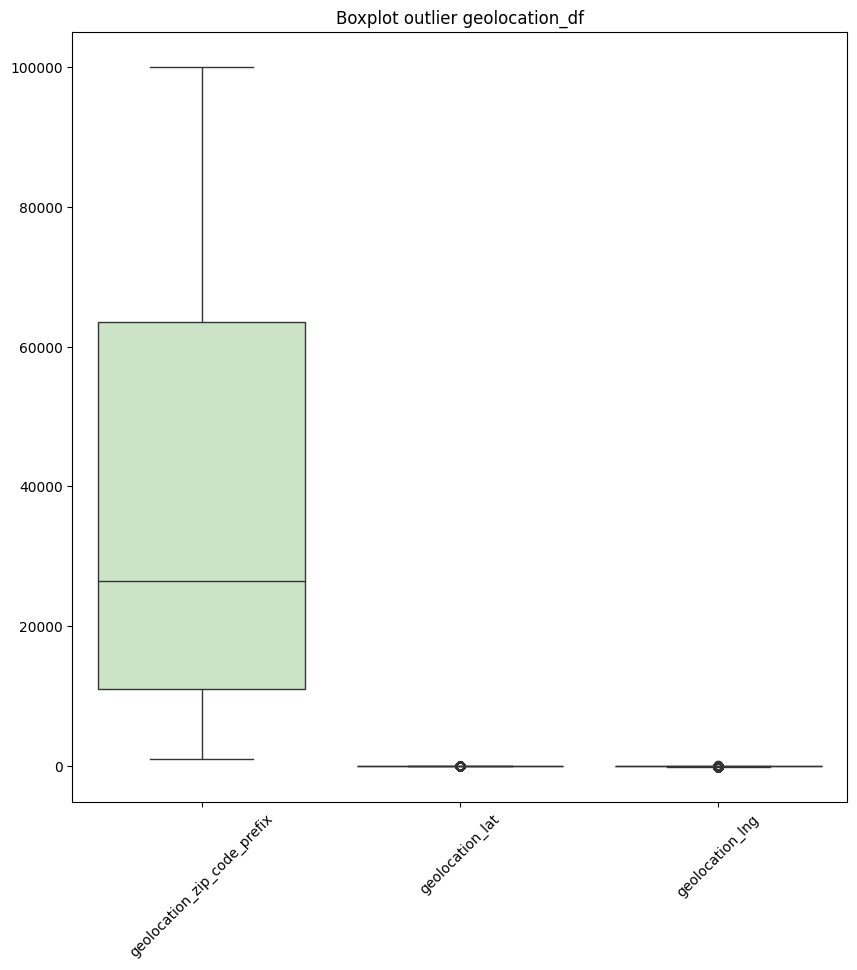

In [24]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 10))
sns.boxplot(data=geolocation_df, palette = "Greens")
plt.title('Boxplot outlier geolocation_df')
plt.xticks(rotation=45)  
plt.show()

In [25]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_geolocation_df = geolocation_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada data geolocation_df:")
print(outlier_geolocation_df)

Jumlah outlier setiap kolom pada data geolocation_df:
geolocation_zip_code_prefix         0
geolocation_lat                168240
geolocation_lng                 42348
geolocation_city                    0
geolocation_state                   0
dtype: int64


In [26]:
def find_outliers(df, col_name, min_len=None, max_len=None):
    if df[col_name].dtype == 'object':
        # Deteksi outlier berdasarkan panjang teks
        outliers = df[
            (df[col_name].str.len() < min_len) | 
            (df[col_name].str.len() > max_len)
        ]
    else:
        # Deteksi outlier berdasarkan nilai numerik
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[
            (df[col_name] < lower_bound) | 
            (df[col_name] > upper_bound)
        ]
    
    return outliers

In [27]:
outliers_geolocation_lat = find_outliers(geolocation_df, 'geolocation_lat')
print("Outliers pada customer_geolocation_lat:")
print(outliers_geolocation_lat[['geolocation_zip_code_prefix', 'geolocation_lat']])

outliers_geolocation_lng = find_outliers(geolocation_df, 'geolocation_lng')
print("\nOutliers pada geolocation_lng:")
print(outliers_geolocation_lng[['geolocation_zip_code_prefix', 'geolocation_lng']])

Outliers pada customer_geolocation_lat:
        geolocation_zip_code_prefix  geolocation_lat
250816                        11200        -8.275689
302630                        13355       -12.993852
304242                        13375        -5.754127
332933                        14185       -14.414915
333157                        14185       -14.411892
...                             ...              ...
997877                        99440       -29.089375
997883                        99440       -29.087320
999082                        99718       -30.855193
999481                        99870       -29.815148
999493                        99870       -29.589687

[168240 rows x 2 columns]

Outliers pada geolocation_lng:
        geolocation_zip_code_prefix  geolocation_lng
250816                        11200       -35.965615
387565                        18243       -15.536867
399300                        19274       -61.932123
502492                        27165       -34.893333


Dalam hal ini karena outlier pada data geolocation_dataset terdeteksi banyak dan berhubungan dengan letak geografis suatu tempat berdasarkan garis lintang dan garis bujur.  Maka outlier ini akan tetap dibiarkan saja berada dalam data.

#### Memeriksa orders_df

In [28]:
print("orders_df memiliki",orders_df.shape[0],"baris dan", orders_df.shape[1], "kolom")

orders_df memiliki 99441 baris dan 8 kolom


In [29]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


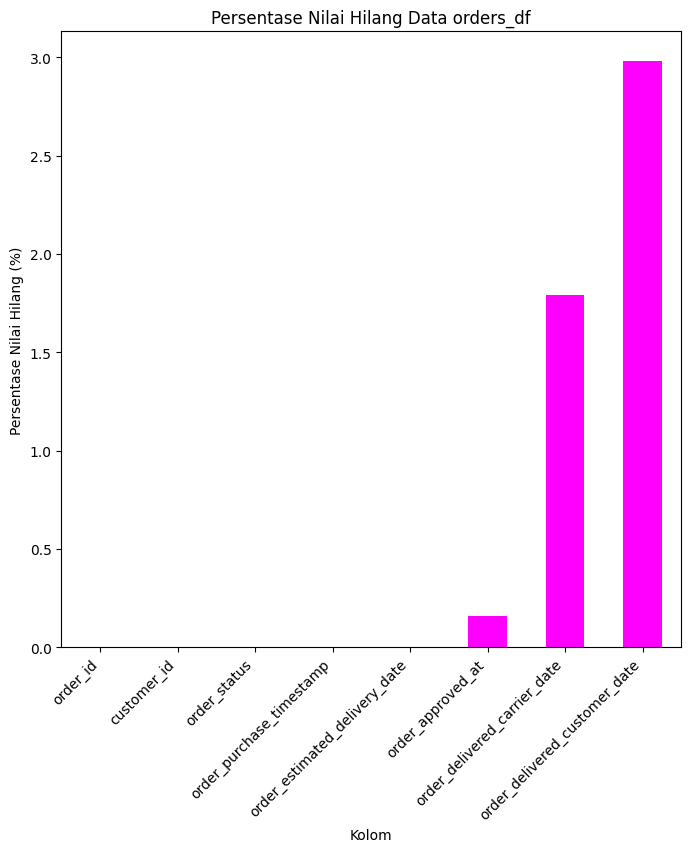

In [30]:
total_rows_orders_df = orders_df.shape[0]
missing_values_orders_df = orders_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_orders_df = (missing_values_orders_df / total_rows_orders_df) * 100

# Membuat diagram batang untuk persentase nilai hilang
missing_percentage_orders_df.sort_values().plot(kind='bar', color='magenta', figsize=(8, 8))

# Menambahkan label persentase pada setiap bar
plt.xlabel('Kolom')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Persentase Nilai Hilang (%)')
plt.title('Persentase Nilai Hilang Data orders_df')
plt.show()

In [31]:
dtypes_orders_df = orders_df[missing_values_orders_df.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_orders_df = pd.DataFrame({
    'Missing Values': missing_values_orders_df,    
    'Data Type': dtypes_orders_df,     
    'Missing Percentage': missing_percentage_orders_df[missing_values_orders_df.index]
})
display(HTML(info_orders_df.to_html()))

,Missing Values,Data Type,Missing Percentage
order_id,0,object,0.000000
customer_id,0,object,0.000000
order_status,0,object,0.000000
order_purchase_timestamp,0,object,0.000000
order_approved_at,160,object,0.160899
order_delivered_carrier_date,1783,object,1.793023
order_delivered_customer_date,2965,object,2.981668
order_estimated_delivery_date,0,object,0.000000


Data orders_df memiliki ketidaktepatan tipe data pada beberapa kolom karena seharusnya tipe datanya berupa "datetime". Kolom2 tersebut yaitu order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date 	 	 	

In [32]:
print("Total baris pada orders_df:")
print(total_rows_orders_df)

# Baris yang memiliki missing value
rows_have_missing_value_od = orders_df[orders_df.isnull().any(axis=1)]

# Jumlah baris yang memiliki missing values
total_rows_with_missing_values_od = len(rows_have_missing_value_od)

print("\nTotal baris dengan nilai hilang pada orders_df:")
print(total_rows_with_missing_values_od)

Total baris pada orders_df:
99441

Total baris dengan nilai hilang pada orders_df:
2980


Data orders_df memiliki missing value pada 3 kolom dari 8 kolom sebenarnya pada data yaitu order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Masing-masing kolom memiliki persentase missing value yang berbeda-beda namun masih terbilang kecil karena persentasenya masing dibawah 5%. Karena banyaknya missing value pada baris terbilang kecil, maka untuk mengatasinya akan dilakukan penghapusan baris yang memiliki missing value yaitu sebanyak 2.980 baris dari 99.441 baris sebenarnya.

In [33]:
print("Banyak duplikat pada orders_df:", orders_df.duplicated().sum())

Banyak duplikat pada orders_df: 0


In [34]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_orders_df = orders_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada data orders_df:")
print(outlier_orders_df)

Jumlah outlier setiap kolom pada data orders_df:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


#### Memeriksa order_items_df

In [35]:
print("order_items_df memiliki",order_items_df.shape[0],"baris dan", order_items_df.shape[1], "kolom")

order_items_df memiliki 112650 baris dan 7 kolom


In [36]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [37]:
total_rows_order_items = order_items_df.shape[0]
missing_values_order_items = order_items_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_order_items = (missing_values_order_items / total_rows_order_items) * 100

dtypes_order_items = order_items_df[missing_values_order_items.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_order_items = pd.DataFrame({
    'Missing Values': missing_values_order_items,    
    'Data Type': dtypes_order_items,     
    'Missing Percentage': missing_percentage_order_items[missing_values_order_items.index]
})
display(HTML(info_order_items.to_html()))

,Missing Values,Data Type,Missing Percentage
order_id,0,object,0.0
order_item_id,0,int64,0.0
product_id,0,object,0.0
seller_id,0,object,0.0
shipping_limit_date,0,object,0.0
price,0,float64,0.0
freight_value,0,float64,0.0


Data order_items_dataset memiliki ketidaktepatan tipe data pada satu kolom karena seharusnya tipe datanya berupa "datetime". Kolom tersebut yaitu shipping_limit_date yang menyimpan informasi waktu batas pengiriman.

In [38]:
print("Banyak duplikat pada order_items_df:", order_items_df.duplicated().sum())

Banyak duplikat pada order_items_df: 0


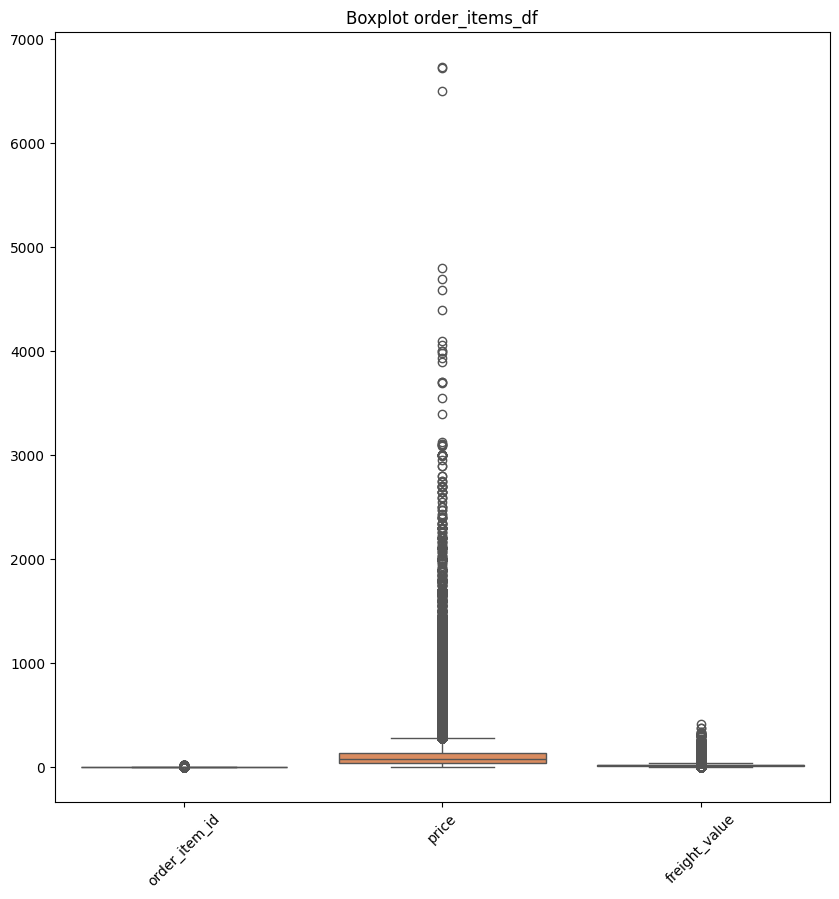

In [39]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 10))
sns.boxplot(data=order_items_df, palette="muted")
plt.title('Boxplot order_items_df')
plt.xticks(rotation=45)  
plt.show()

In [40]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_order_items = order_items_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada order_items_df:")
print(outlier_order_items)

Jumlah outlier setiap kolom pada order_items_df:
order_id                   0
order_item_id          13984
product_id                 0
seller_id                  0
shipping_limit_date        0
price                   8427
freight_value          12134
dtype: int64


In [41]:
# Menampilkan outlier pada kolom order_item_id 
outliers_order_item_id = find_outliers(order_items_df, 'order_item_id')
print("Outlier pada kolom order_item_id:")
print(outliers_order_item_id[['order_id', 'order_item_id']])

# Menampilkan outlier pada price 
outliers_price = find_outliers(order_items_df, 'price')
print("Outlier pada kolom price:")
print(outliers_price[['order_id', 'price']])

# Menampilkan outlier pada freight_value
outliers_freight_value = find_outliers(order_items_df, 'freight_value')
print("Outlier pada kolom freight_value:")
print(outliers_freight_value[['order_id', 'freight_value']])


Outlier pada kolom order_item_id:
                                order_id  order_item_id
14      0008288aa423d2a3f00fcb17cd7d8719              2
33      00143d0f86d6fbd9f9b38ab440ac16f5              2
34      00143d0f86d6fbd9f9b38ab440ac16f5              3
43      001ab0a7578dd66cd4b0a71f5b6e1e41              2
44      001ab0a7578dd66cd4b0a71f5b6e1e41              3
...                                  ...            ...
112617  ffecd5a79a0084f6a592288c67e3c298              3
112635  fff8287bbae429a99bb7e8c21d151c41              2
112641  fffb9224b6fc7c43ebb0904318b10b5f              2
112642  fffb9224b6fc7c43ebb0904318b10b5f              3
112643  fffb9224b6fc7c43ebb0904318b10b5f              4

[13984 rows x 2 columns]
Outlier pada kolom price:
                                order_id   price
7       000576fe39319847cbb9d288c5617fa6  810.00
16      0009c9a17f916a706d71784483a5d643  639.00
26      0011d82c4b53e22e84023405fb467e57  289.00
30      00137e170939bba5a3134e2386413108  397.

Data order_items_dataset terdeteksi memiliki outlier pada 3 kolom yaitu order_item_id, price, dan freight_value. Outlier pada kolom-kolom tersebut akan tetap dibiarkan berada dalam data. Hal itu dilakukan karena outlier yang terdeteksi tidak menunjukkan adanya anomali atau kesalahan yang jelas. Seperti pada kolom "price" mungkin terdeteksi karena harga tersebut berada jauh dari median atau mean harga di dataset. Misalnya, harga yang jauh lebih tinggi atau lebih rendah dibandingkan harga umum akan dianggap sebagai outlier.

#### Memeriksa order_payments_df

In [42]:
print("order_payments_df memiliki",order_payments_df.shape[0],"baris dan", order_payments_df.shape[1], "kolom")

order_payments_df memiliki 103886 baris dan 5 kolom


In [43]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [44]:
total_rows_order_payments = order_payments_df.shape[0]
missing_values_order_payments = order_payments_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_order_payments = (missing_values_order_payments / total_rows_order_payments) * 100

dtypes_order_payments = order_payments_df[missing_values_order_payments.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_order_payments = pd.DataFrame({
    'Missing Values': missing_values_order_payments,    
    'Data Type': dtypes_order_payments,     
    'Missing Percentage': missing_percentage_order_payments[missing_values_order_payments.index]
})
display(HTML(info_order_payments.to_html()))

,Missing Values,Data Type,Missing Percentage
order_id,0,object,0.0
payment_sequential,0,int64,0.0
payment_type,0,object,0.0
payment_installments,0,int64,0.0
payment_value,0,float64,0.0


In [45]:
print("Banyak duplikat pada order_payments:", order_payments_df.duplicated().sum())

Banyak duplikat pada order_payments: 0


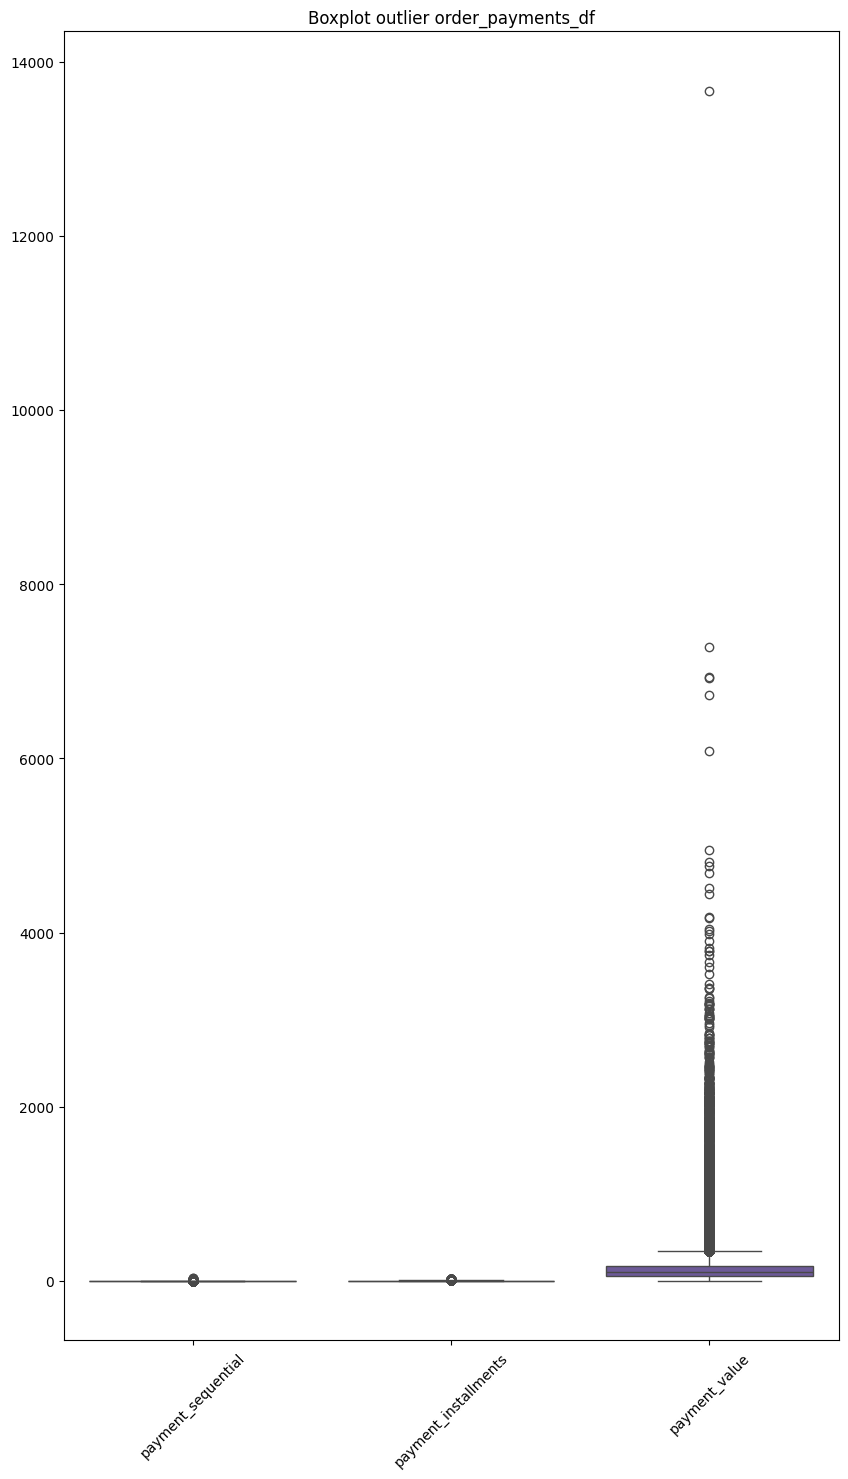

In [46]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 17))
sns.boxplot(data=order_payments_df, palette="Purples")
plt.title('Boxplot outlier order_payments_df')
plt.xticks(rotation=45)  
plt.show()

In [47]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_order_payments = order_payments_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada data order_payments_dft:")
print(outlier_order_payments)

Jumlah outlier setiap kolom pada data order_payments_dft:
order_id                   0
payment_sequential      4526
payment_type               0
payment_installments    6313
payment_value           7981
dtype: int64


In [48]:
# Menampilkan outlier pada kolom payment_sequential 
outliers_payment_sequential = find_outliers(order_payments_df, 'payment_sequential')
print("Outlier pada kolom payment_sequential:")
print(outliers_payment_sequential[['order_id', 'payment_sequential']])

# Menampilkan outlier pada payment_installments 
outliers_payment_installments = find_outliers(order_payments_df, 'payment_installments')
print("Outlier pada kolom payment_installments:")
print(outliers_payment_installments[['order_id', 'payment_installments']])

# Menampilkan outlier pada payment_value
outliers_payment_value = find_outliers(order_payments_df, 'payment_value')
print("Outlier pada kolom payment_value:")
print(outliers_payment_value[['order_id', 'payment_value']])

Outlier pada kolom payment_sequential:
                                order_id  payment_sequential
25      5cfd514482e22bc992e7693f0e3e8df7                   2
75      3689194c14ad4e2e7361ebd1df0e77b0                   2
102     21b8b46679ea6482cbf911d960490048                   2
121     ea9184ad433a404df1d72fa0a8764232                   4
139     82ffe097d8ddbf319a523b9bbe7725d5                   2
...                                  ...                 ...
103569  fedcd9f7ccdc8cba3a18defedd1a5547                   6
103732  f0a5b7c94819c69d12a1c0458ec74756                   2
103747  cf101c3abd3c061ca9f78c1bbb1125af                   3
103750  d0bff47153ef056bb4f884a2ec2f0691                   2
103860  31bc09fdbd701a7a4f9b55b5955b8687                   6

[4526 rows x 2 columns]
Outlier pada kolom payment_installments:
                                order_id  payment_installments
15      12e5cfe0e4716b59afb0e0f4a3bd6570                    10
23      4d680edbaa7d3d9bed69532957368

Data order_payments_df terdeteksi memiliki outlier pada 3 kolom yaitu payment_sequential, payment_installments, dan payment_value. Outlier pada kolom-kolom tersebut akan tetap dibiarkan berada dalam data. Hal itu dilakukan karena outlier yang terdeteksi tidak menunjukkan adanya anomali atau kesalahan yang jelas.

#### Memeriksa order_reviews_df

In [49]:
print("order_reviews_df memiliki",order_reviews_df.shape[0],"baris dan", order_reviews_df.shape[1], "kolom")

order_reviews_df memiliki 99224 baris dan 7 kolom


In [50]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


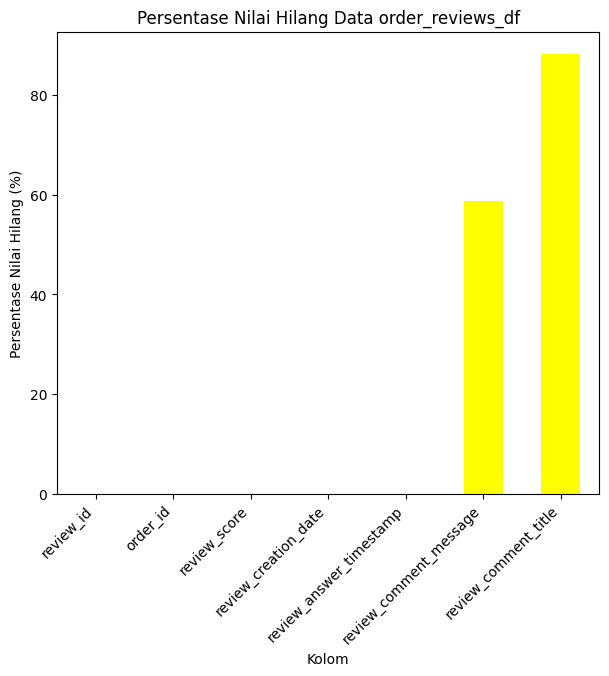

In [51]:
total_rows_order_reviews = order_reviews_df.shape[0]
missing_values_order_reviews = order_reviews_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_order_reviews = (missing_values_order_reviews / total_rows_order_reviews) * 100

# Membuat diagram batang untuk persentase nilai hilang
missing_percentage_order_reviews.sort_values().plot(kind='bar', color='yellow', figsize=(7, 6))

# Menambahkan label persentase pada setiap bar
plt.xlabel('Kolom')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Persentase Nilai Hilang (%)')
plt.title('Persentase Nilai Hilang Data order_reviews_df')
plt.show()

In [52]:
dtypes_order_reviews = order_reviews_df[missing_values_order_reviews.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_order_reviews = pd.DataFrame({
    'Missing Values': missing_values_order_reviews,    
    'Data Type': dtypes_order_reviews,     
    'Missing Percentage': missing_percentage_order_reviews[missing_values_order_reviews.index]
})
display(HTML(info_order_reviews.to_html()))

,Missing Values,Data Type,Missing Percentage
review_id,0,object,0.000000
order_id,0,object,0.000000
review_score,0,int64,0.000000
review_comment_title,87656,object,88.341530
review_comment_message,58247,object,58.702532
review_creation_date,0,object,0.000000
review_answer_timestamp,0,object,0.000000


Data order_reviews_df memiliki ketidaktepatan tipe data pada dua kolom karena seharusnya tipe datanya berupa "datetime". Kolom tersebut yaitu review_creation_date dan review_answer_timestamp.

In [53]:
print("Total baris pada order_reviews_df:")
print(total_rows_order_reviews)

# Baris yang memiliki missing value
rows_have_missing_value_or = order_reviews_df[order_reviews_df.isnull().any(axis=1)]

# Jumlah baris yang memiliki missing values
total_rows_with_missing_values_or = len(rows_have_missing_value_or)

print("\nTotal baris dengan nilai hilang pada order_reviews_df:")
print(total_rows_with_missing_values_or)

Total baris pada order_reviews_df:
99224

Total baris dengan nilai hilang pada order_reviews_df:
89385


Data order_reviews_df memiliki missing value pada 2 kolom dari 7 kolom sebenarnya pada data yaitu review_comment_title dan review_comment_message. Kedua kolom tersebut memiliki persentase missing value yang terbilang besar karena berada di atas 50%. Dalam hal ini banyak baris yang memiliki missing value mencapai 89.385 baris dari 99.224 baris sebenarnya pada data. Karena banyaknya missing value pada baris yang terbilang besar, maka untuk mengatasinya akan dilakukan berbagai teknik campuran sesuai kondisi data.

In [54]:
print("Banyak duplikat pada order_reviews_df:", order_reviews_df.duplicated().sum())

Banyak duplikat pada order_reviews_df: 0


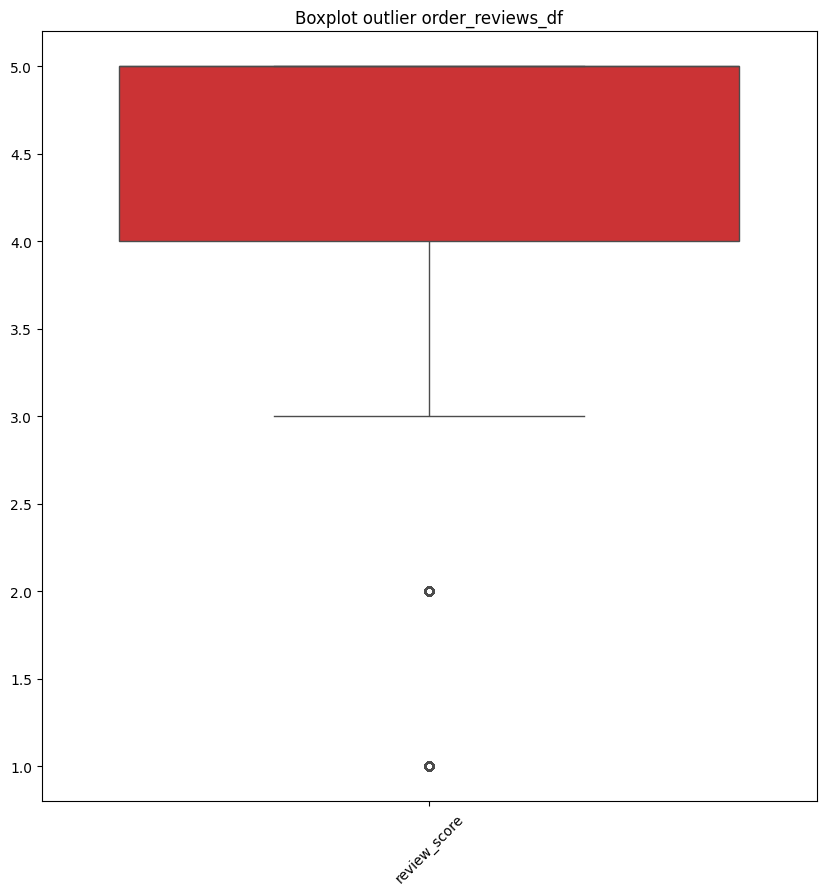

In [55]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=order_reviews_df, palette="Set1")
plt.title('Boxplot outlier order_reviews_df')
plt.xticks(rotation=45)  
plt.show()

In [56]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_order_reviews = order_reviews_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada order_reviews_df:")
print(outlier_order_reviews)

Jumlah outlier setiap kolom pada order_reviews_df:
review_id                      0
order_id                       0
review_score               14575
review_comment_title           0
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [57]:
# Menampilkan outlier pada kolom review_score
outliers_review_score = find_outliers(order_reviews_df, 'review_score')
print("Outlier pada kolom review_score:")
print(outliers_review_score[['order_id', 'review_score']])

# Menampilkan outlier pada review_comment_title berdasarkan panjang teks
outliers_review_title = find_outliers(order_reviews_df, 'review_comment_title', min_len=5, max_len=100)
print("Outlier pada kolom review_comment_title:")
print(outliers_review_title[['order_id', 'review_score' ,'review_comment_title']])

# Menampilkan outlier pada review_comment_message berdasarkan panjang teks
outliers_review_message = find_outliers(order_reviews_df, 'review_comment_message', min_len=5, max_len=300)
print("Outlier pada kolom review_comment_message:")
print(outliers_review_message[['order_id', 'review_score', 'review_comment_message']])


Outlier pada kolom review_score:
                               order_id  review_score
5      b18dcdf73be66366873cd26c5724d1dc             1
16     0dacf04c5ad59fd5a0cc1faa07c34e39             2
19     583174fbe37d3d5f0d6661be3aad1786             1
29     0ce9a24111d850192a933fcaab6fbad3             1
32     68e55ca79d04a79f20d4bfc0146f4b66             1
...                                 ...           ...
99174  fff2cdc825f9fc0ba3c04227cfa02303             2
99184  54e6829fe81bc86cf88b12e6d07ea298             1
99200  f2d12dd37eaef72ed7b1186b2edefbcd             2
99203  18ed848509774f56cc8c1c0a1903ad7f             2
99223  90531360ecb1eec2a1fbb265a0db0508             1

[14575 rows x 2 columns]
Outlier pada kolom review_comment_title:
                               order_id  review_score review_comment_title
36     e029f708df3cc108b3264558771605c6             5                  Bom
166    1e91914c9706a5d4665b8c5a6294b107             4                   4 
228    06ecfa8dfae87263e05d

Data order_reviews_df terdeteksi memiliki outlier pada 3 kolom yaitu review_score, review_comment_title, dan review_comment_title. Outlier pada kolom review_score masih bisa diterima karena  tidak menunjukkan adanya anomali atau kesalahan yang jelas. Sedangkan pada kolom review_comment_title memang terdapat angka seperti "10" dan "8", begitupun dengan review_comment_message terdapat angka '10' yang tampak tidak biasa karena biasanya kolom ini diharapkan berisi teks tentang ulasan. Sehingga outlier pada kolom review_comment_title dan review_comment_title akan diatasi.

#### Memeriksa products_df

In [58]:
print("products_df memiliki",products_df.shape[0],"baris dan", products_df.shape[1], "kolom")

products_df memiliki 32951 baris dan 9 kolom


In [59]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


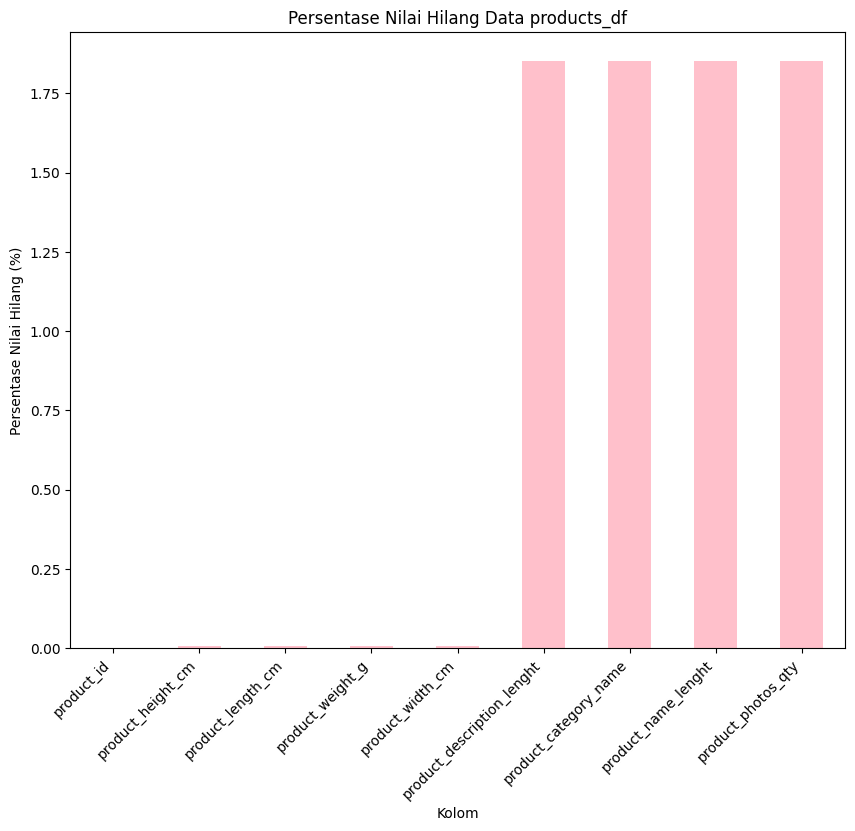

In [60]:
total_rows_products_df = products_df.shape[0]
missing_values_products_df = products_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_products_df = (missing_values_products_df / total_rows_products_df) * 100

# Membuat diagram batang untuk persentase nilai hilang
missing_percentage_products_df.sort_values().plot(kind='bar', color='pink', figsize=(10, 8))

# Menambahkan label persentase pada setiap bar
plt.xlabel('Kolom')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Persentase Nilai Hilang (%)')
plt.title('Persentase Nilai Hilang Data products_df')
plt.show()

In [61]:
dtypes_products_df = products_df[missing_values_products_df.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_products_df = pd.DataFrame({
    'Missing Values': missing_values_products_df,    
    'Data Type': dtypes_products_df,     
    'Missing Percentage': missing_percentage_products_df[missing_values_products_df.index]
})
display(HTML(info_products_df.to_html()))

,Missing Values,Data Type,Missing Percentage
product_id,0,object,0.000000
product_category_name,610,object,1.851234
product_name_lenght,610,float64,1.851234
product_description_lenght,610,float64,1.851234
product_photos_qty,610,float64,1.851234
product_weight_g,2,float64,0.006070
product_length_cm,2,float64,0.006070
product_height_cm,2,float64,0.006070
product_width_cm,2,float64,0.006070


Data products_df memiliki ketidaktepatan tipe data pada beberapa kolom karena seharusnya tipe datanya berupa "integer". Kolom tersebut yaitu product_name_lenght, product_description_lenght, dan product_photos_qty.

In [62]:
print("Total baris pada products_df:")
print(total_rows_products_df)

# Baris yang memiliki missing value
rows_have_missing_value_pd = products_df[products_df.isnull().any(axis=1)]

# Jumlah baris yang memiliki missing values
total_rows_with_missing_values_pd = len(rows_have_missing_value_pd)

print("\nTotal baris dengan nilai hilang pada products_df:")
print(total_rows_with_missing_values_pd)

Total baris pada products_df:
32951

Total baris dengan nilai hilang pada products_df:
611


Data products_df memiliki missing value pada 8 kolom dari 9 kolom sebenarnya pada data. Masing-masing kolom tersebut memiliki persentase missing value yang relatif kecil karena berada di bawah 5%. Dalam hal ini banyak baris yang memiliki missing value ada 611 baris dari 32.951 baris sebenarnya pada data. Karena missing value pada baris masih terbilang kecil, maka akan dilakukan penghapusan baris yang memiliki missing value.

In [63]:
print("Banyak duplikat pada products_df:", products_df.duplicated().sum())

Banyak duplikat pada products_df: 0


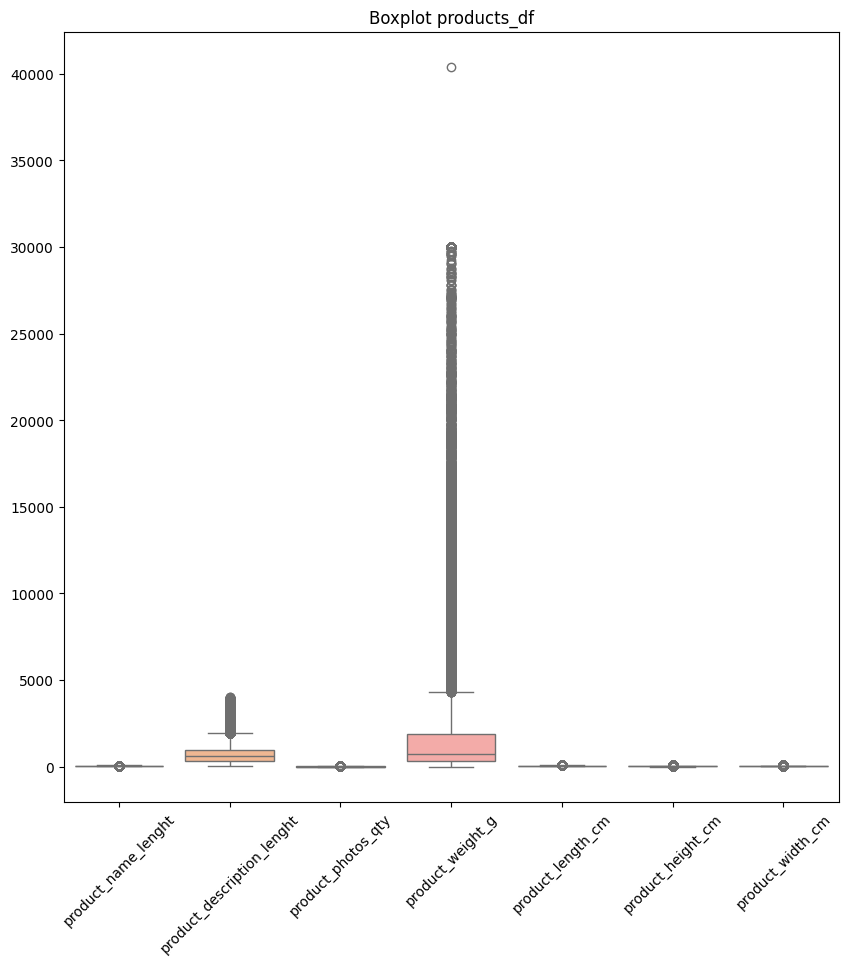

In [64]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 10))
sns.boxplot(data=products_df, palette="pastel")
plt.title('Boxplot products_df')
plt.xticks(rotation=45)  
plt.show()

In [65]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_products_df = products_df.apply(count_outliers)

print("Jumlah outlier setiap kolom pada products_df:")
print(outlier_products_df)

Jumlah outlier setiap kolom pada products_df:
product_id                       0
product_category_name            0
product_name_lenght            290
product_description_lenght    2078
product_photos_qty             849
product_weight_g              4551
product_length_cm             1380
product_height_cm             1892
product_width_cm               912
dtype: int64


Data products_df memiliki outlier hampir di semua kolom. Tetapi karena kolom-kolom yang memiliki outlier tidak akan digunakan dalam analisis data, maka outlier tersebut akan tetap dibiarkan berada pada data.

#### Memeriksa sellers_df

In [66]:
print("sellers_df memiliki",sellers_df.shape[0],"baris dan", sellers_df.shape[1], "kolom")

sellers_df memiliki 3095 baris dan 4 kolom


In [67]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [68]:
total_rows_sellers_df = sellers_df.shape[0]
missing_values_sellers_df = sellers_df.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_sellers_df = (missing_values_sellers_df / total_rows_sellers_df) * 100

dtypes_sellers_df = sellers_df[missing_values_sellers_df.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_sellers_df = pd.DataFrame({
    'Missing Values': missing_values_sellers_df,    
    'Data Type': dtypes_sellers_df,     
    'Missing Percentage': missing_percentage_sellers_df[missing_values_sellers_df.index]
})
display(HTML(info_sellers_df.to_html()))

,Missing Values,Data Type,Missing Percentage
seller_id,0,object,0.0
seller_zip_code_prefix,0,int64,0.0
seller_city,0,object,0.0
seller_state,0,object,0.0


In [69]:
print("Banyak duplikat pada sellers_df:", sellers_df.duplicated().sum())

Banyak duplikat pada sellers_df: 0


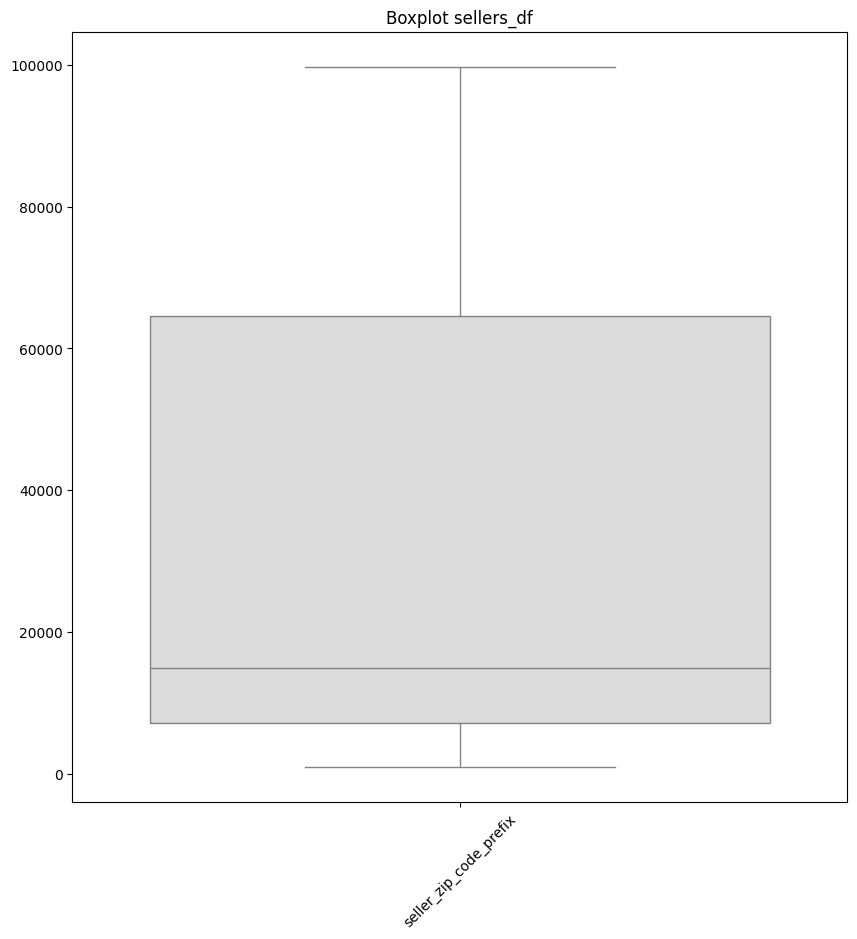

In [70]:
# Menampilkan boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 10))
sns.boxplot(data=sellers_df, palette="coolwarm")
plt.title('Boxplot sellers_df')
plt.xticks(rotation=45)  
plt.show()

In [71]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_sellers_df = sellers_df.apply(count_outliers)

print("Jumlah outlier setiap kolom sellers_df:")
print(outlier_sellers_df)

Jumlah outlier setiap kolom sellers_df:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


#### Memeriksa category_translation

In [72]:
print("category_translation memiliki",category_translation.shape[0],"baris dan", category_translation.shape[1], "kolom")

category_translation memiliki 71 baris dan 2 kolom


In [73]:
 category_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [74]:
total_rows_category_translation =  category_translation.shape[0]
missing_values_category_translation =  category_translation.isnull().sum()

# Menghitung persentase nilai hilang untuk setiap kolom
missing_percentage_category_translation = (missing_values_category_translation / total_rows_category_translation) * 100

dtypes_category_translation = category_translation[missing_values_category_translation.index].dtypes

#Menampilkan kolom dengan nilai yang hilang dan tipe datanya
info_category_translation = pd.DataFrame({
    'Missing Values': missing_values_category_translation,    
    'Data Type': dtypes_category_translation,     
    'Missing Percentage': missing_percentage_category_translation[missing_values_category_translation.index]
})
display(HTML(info_category_translation.to_html()))

,Missing Values,Data Type,Missing Percentage
product_category_name,0,object,0.0
product_category_name_english,0,object,0.0


In [75]:
print("Banyak duplikat pada category_translation:", category_translation.duplicated().sum())

Banyak duplikat pada category_translation: 0


In [76]:
# Menghitung jumlah outlier untuk setiap kolom
outlier_category_translation = category_translation.apply(count_outliers)

print("Jumlah outlier setiap kolom pada category_translation:")
print(outlier_category_translation)

Jumlah outlier setiap kolom pada category_translation:
product_category_name            0
product_category_name_english    0
dtype: int64


### Cleaning Data

#### Membersihkan geolocation_df

In [77]:
geolocation_df.drop_duplicates(inplace=True)
print("Banyak data duplikat geolocation_df sekarang : ", geolocation_df.duplicated().sum())

Banyak data duplikat geolocation_df sekarang :  0


#### Membersihkan orders_df

In [78]:
# Mengubah tipe data menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [79]:
orders_df.dropna(inplace=True)

print("Banyak baris tiap kolom orders_df dengan missing value:", orders_df.isnull().sum())

Banyak baris tiap kolom orders_df dengan missing value: order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


#### Membersihkan order_items_df

In [80]:
# Mengubah tipe data menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

#### Membersihkan order_reviews_df

In [81]:
# Mengubah tipe data menjadi datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

Menangani missing value

In [82]:
# Mengelompokkan data berdasarkan review_score
grouped =  order_reviews_df.groupby('review_score')['review_comment_message']

# Menghitung frekuensi setiap review_comment_message dalam setiap review_score
frequency = grouped.value_counts()

# Menampilkan review_comment_message yang paling sering muncul dalam setiap review_score
most_frequent_message = frequency.groupby(level=0).idxmax()
most_frequent_counts = frequency.groupby(level=0).max()

# Menggabungkan hasil dalam DataFrame untuk tampilan yang lebih baik
result_df = pd.DataFrame({
    'Most_Frequent_Message': most_frequent_message,
    'Count': most_frequent_counts
}).reset_index()

# Menampilkan hasil
print(result_df)

   review_score      Most_Frequent_Message  Count
0             1  (1, Não recebi o produto)     30
1             2                    (2, ok)      4
2             3                   (3, Bom)     33
3             4                   (4, Bom)     66
4             5             (5, Muito bom)    175


Ternyata review_comment_message yang paling sering muncul pada skor 1 kebanyakan berkomentar tentang pesanan belum diterima pelanggan. Dalam hal ini akan dilakukan teknik filter pada baris dengan pesanan belum diterima pelanggan. Kemudian mengisi missing value pada review_comment_title yang berhubungan pesanan belum diterima pelanggan dengan 'pedido não chegou'.

In [83]:
phrases = [
    'não recebi o produto',   # "Belum menerima produk"
    'não chegou',             # "Belum tiba"
    'ainda não recebi',       # "Masih belum menerima"
    'produto não entregue',   # "Produk tidak terkirim"
    'não recebi minha encomenda',
    'pedido não chegou' #"Belum menerima pesanan saya"
]

# Menggabungkan semua kondisi menjadi satu
filter_condition = order_reviews_df['review_comment_message'].str.contains('|'.join(phrases), case=False, na=False)

# Filter baris yang sesuai dengan salah satu frasa di atas
not_accept = order_reviews_df[filter_condition]

# Menghitung jumlah pelanggan unik yang belum menerima produk
many_not_accept = not_accept['order_id'].nunique()

# Menampilkan hasil
print("Banyak pelanggan belum menerima pesanan di review_comment_message:", many_not_accept)

# Sebelum Eksekusi: Hitung jumlah baris yang memiliki missing value sesuai kondisi sebelum pengisian
before_fill = order_reviews_df.loc[filter_condition & order_reviews_df['review_comment_title'].isnull()].shape[0]
print(f"Banyak pelanggan belum menerima pesanan yang memiliki missing value pada review_comment_title: {before_fill}")

Banyak pelanggan belum menerima pesanan di review_comment_message: 1588
Banyak pelanggan belum menerima pesanan yang memiliki missing value pada review_comment_title: 1316


In [84]:
# Eksekusi: Mengisi missing value pada kolom 'review_comment_title' dengan 'pedido não chegou' untuk baris yang memenuhi kondisi
order_reviews_df.loc[filter_condition & order_reviews_df['review_comment_title'].isnull(), 'review_comment_title'] = 'pedido não chegou'

# Validasi tambahan: Memeriksa baris yang masih memiliki missing value di kolom review_comment_title setelah eksekusi
order_reviews_df.loc[filter_condition & order_reviews_df['review_comment_title'].isnull()].shape[0]
print(f"Banyak pelanggan belum menerima pesanan yang masih memiliki missing value pada review_comment_title: {order_reviews_df['review_comment_title'].isnull().sum()}")

Banyak pelanggan belum menerima pesanan yang masih memiliki missing value pada review_comment_title: 86340


Dapat dilihat bahwa review_comment_message yang sering muncul berhubungan dengan kata2 bagus atau tidaknya suatu produk. Oleh karena itu missing value pada kolom review_comment_message dengan skor 1 diisi 'Muito ruim', skor 2 diisi 'Ruim', skor 3 diisi 'Suficiente bom', skor 4 diisi 'Bom', dan skor 5 diisi dengan 'Muito bom'

In [85]:
# Definisikan fungsi untuk mengisi nilai berdasarkan skor
def fill_review_comment_message(row):
    if pd.isnull(row['review_comment_message']):
        if row['review_score'] == 1:
            return 'Muito ruim'
        elif row['review_score'] == 2:
            return 'Ruim'
        elif row['review_score'] == 3:
            return 'Suficiente bom'
        elif row['review_score'] == 4:
            return 'Bom'
        elif row['review_score'] == 5:
            return 'Muito bom'
    return row['review_comment_message']

# Terapkan fungsi untuk mengisi missing value
order_reviews_df['review_comment_message'] = order_reviews_df.apply(fill_review_comment_message, axis=1)

# Menampilkan hasil setelah pengisian missing value
print("Banyak missing value pada review_comment_message setelah pengisian:", order_reviews_df['review_comment_message'].isnull().sum())

Banyak missing value pada review_comment_message setelah pengisian: 0


In [86]:
# Mengelompokkan data berdasarkan review_score
grouped2 =  order_reviews_df.groupby('review_score')['review_comment_title']

# Menghitung frekuensi setiap review_comment_title dalam setiap review_score
frequency2 = grouped2.value_counts()

# Menampilkan review_comment_title yang paling sering muncul dalam setiap review_score
most_frequent_title = frequency2.groupby(level=0).idxmax()
most_frequent_counts2 = frequency2.groupby(level=0).max()

# Menggabungkan hasil dalam DataFrame untuk tampilan yang lebih baik
result_df2 = pd.DataFrame({
    'Most_Frequent_Title': most_frequent_title,
    'Count': most_frequent_counts2
}).reset_index()

# Menampilkan hasil
print(result_df2)

   review_score     Most_Frequent_Title  Count
0             1  (1, pedido não chegou)   1017
1             2  (2, pedido não chegou)    136
2             3  (3, pedido não chegou)     98
3             4          (4, recomendo)    125
4             5          (5, Recomendo)    276


Perhatikan bahwa review_comment_title yang sering muncul berhubungan dengan rekomendasi pelanggan. Oleh karena itu missing value pada kolom review_comment_title dengan skor 1 diisi 'Não Recomendo', skor 2 diisi 'Menos Recomendo', skor 3 diisi 'Regular', skor 4 diisi 'Recomendo', dan skor 5 diisi dengan 'Muito Recomendo'

In [87]:
# Definisikan fungsi untuk mengisi nilai berdasarkan skor
def fill_review_comment_title(row):
    if pd.isnull(row['review_comment_title']):
        if row['review_score'] == 1:
            return 'Não Recomendo'
        elif row['review_score'] == 2:
            return 'Menos Recomendo'
        elif row['review_score'] == 3:
            return 'Regular'
        elif row['review_score'] == 4:
            return 'Recomendo'
        elif row['review_score'] == 5:
            return 'Muito Recomendo'
    return row['review_comment_title']

# Terapkan fungsi untuk mengisi missing value
order_reviews_df['review_comment_title'] = order_reviews_df.apply(fill_review_comment_title, axis=1)

# Menampilkan hasil setelah pengisian missing value
print("Banyak missing value pada review_comment_title setelah pengisian:", order_reviews_df['review_comment_title'].isnull().sum())

Banyak missing value pada review_comment_title setelah pengisian: 0


In [88]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Menangani outlier

In [89]:
# Definisikan mapping dari review_score ke review_comment_title
score_to_title = {
    1: 'Não Recomendo',
    2: 'Menos Recomendo',
    3: 'Regular',
    4: 'Recomendo',
    5: 'Muito Recomendo'
}

# Fungsi untuk mengganti review_comment_title berdasarkan review_score
def replace_outlier_with_score_title(row):
    if pd.isnull(row['review_comment_title']) or row['review_comment_title'].isdigit():
        return score_to_title.get(row['review_score'], row['review_comment_title'])
    return row['review_comment_title']

# Terapkan fungsi ke DataFrame
order_reviews_df['review_comment_title'] = order_reviews_df.apply(replace_outlier_with_score_title, axis=1)

# Menampilkan hasil 
order_reviews_df[['order_id', 'review_score', 'review_comment_title']]

,order_id,review_score,review_comment_title
0,73fc7af87114b39712e6da79b0a377eb,4,Recomendo
1,a548910a1c6147796b98fdf73dbeba33,5,Muito Recomendo
2,f9e4b658b201a9f2ecdecbb34bed034b,5,Muito Recomendo
3,658677c97b385a9be170737859d3511b,5,Muito Recomendo
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,Muito Recomendo
...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,Muito Recomendo
99220,22ec9f0669f784db00fa86d035cf8602,5,Muito Recomendo
99221,55d4004744368f5571d1f590031933e4,5,Muito Recomendo
99222,7725825d039fc1f0ceb7635e3f7d9206,4,Recomendo


In [90]:
# Definisikan mapping dari review_score ke review_comment_message
score_to_message = {
    1 : 'Muito ruim', 
    2 : 'Ruim', 
    3 : 'Suficiente bom', 
    4 : 'Bom',  
    5 : 'Muito bom'
}

# Fungsi untuk mengganti review_comment_message berdasarkan review_score
def replace_outlier_with_score_message(row):
    if pd.isnull(row['review_comment_message']) or row['review_comment_message'].isdigit():
        return score_to_message.get(row['review_score'], row['review_comment_message'])
    return row['review_comment_message']

# Terapkan fungsi ke DataFrame
order_reviews_df['review_comment_message'] = order_reviews_df.apply(replace_outlier_with_score_message, axis=1)

# Menampilkan hasil setelah penggantian
order_reviews_df[['order_id', 'review_score', 'review_comment_message']]

,order_id,review_score,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,Bom
1,a548910a1c6147796b98fdf73dbeba33,5,Muito bom
2,f9e4b658b201a9f2ecdecbb34bed034b,5,Muito bom
3,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,Muito bom
99220,22ec9f0669f784db00fa86d035cf8602,5,Muito bom
99221,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super..."
99222,7725825d039fc1f0ceb7635e3f7d9206,4,Bom


#### Membersihkan products_df

In [91]:
# Mengubah tipe data kolom menjadi integer
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype('Int64')
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype('Int64')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('Int64')

products_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght             Int64
product_description_lenght      Int64
product_photos_qty              Int64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [92]:
products_df.dropna(inplace=True)

print("Banyak baris yang masih memiliki missing value:", products_df.isnull().sum())

Banyak baris yang masih memiliki missing value: product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


## Exploratory Data Analysis (EDA)

In [93]:
city_customer_counts = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
state_customer_counts = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
print("Customer counts by city:")
print(city_customer_counts)
print("\nCustomer counts by state:")
print(state_customer_counts)

Customer counts by city:
customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

Customer counts by state:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan tidak merata pada setiap kota dan negara bagian. terlihat bahwa jumlah pelanggan sangat terkonsentrasi di beberapa kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte. Dengan São Paulo memiliki jumlah pelanggan yang jauh lebih tinggi dibandingkan kota lainnya. Sedangkan negara bagian São Paulo (SP) memiliki jumlah pelanggan yang jauh lebih tinggi dibandingkan negara bagian lain.

In [94]:
customer_id_in_orders_df = orders_df.customer_id.values

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
62863,025aacb42b2bf1b72a848fa69a0a6a96,ba8bced49158b78f0a5df3edab1d4668,12242,sao jose dos campos,SP,Active
55212,8770f1c3c7f74179623f3e8bec71ae4b,881f2cd9fd589a2d3e84ccb6a1aa08b7,4836,sao paulo,SP,Active
91738,e27a8cc9ed6af44e996a710cc9c09565,1008b3f31c6a196efdfc4c1300b72ffb,29706,colatina,ES,Active
86120,ed2477fdffb22d49fd5485a80041ed09,67a4c5e74e51364ed94b1822508c2e7f,19802,assis,SP,Active
14495,c852de8b3ffc76d74b6a201e22a92f30,7afe5ca82a84ed4b8fe9f7463f17abba,76805,porto velho,RO,Active


In [95]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

Membuat kolom baru bernama 'status' untuk mengetahui pelanggan 'Active' yaitu pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali. Untuk 'Non Active' mungkin menunjukkan pelanggan yang terdaftar dalam sistem tetapi tidak melakukan transaksi, tidak meninggalkan ulasan, atau tidak terlibat dalam aktivitas lain.

In [96]:
#Menggabungkan customers_df dan orders_df berdasarkan customer_id
cust_orders = pd.merge(
    left=customers_df,
    right=orders_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [97]:
#Menggabungkan cust_orders dan order_items_df berdasarkan order_id
cust_orders_items = pd.merge(
    left=cust_orders ,
    right=order_items_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
cust_orders_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [98]:
print("cust_orders_items memiliki",cust_orders_items.shape[0],"baris dan", cust_orders_items.shape[1], "kolom")

cust_orders_items memiliki 110180 baris dan 19 kolom


In [99]:
cust_orders_items.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [100]:
cust_orders_items.sort_values(by="price", ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14965,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,Active,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
23505,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,Active,fefacc66af859508bf1a7934eab1e97f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
4319,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,Active,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
30239,df55c14d1476a9a3467f131269c2477f,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,Active,a96610ab360d42a2e5335a3998b4718a,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
13372,24bbf5fd2f2e1b359ee7de94defc4a15,eebb5dda148d3893cdaf5b5ca3040ccb,9341,maua,SP,Active,199af31afc78c699f0dbf71fb178d4d4,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52208,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,Active,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
52189,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,Active,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
38693,9f9d249355f63c5c1216a82b802452c1,b38211bd797f4fdd81a98b9d1754b606,25215,duque de caxias,RJ,Active,6e864b3f0ec71031117ad4cf46b7f2a1,delivered,2018-04-24 20:15:21,2018-04-24 20:33:18,2018-04-25 13:36:00,2018-05-04 19:32:53,2018-05-18,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
3492,161b6d415e8b3413c6609c70cf405b5a,d80730c15c647bc8f2ad77c908ba5ca9,13189,hortolandia,SP,Active,3ee6513ae7ea23bdfab5b9ab60bffcb5,delivered,2018-04-24 11:01:06,2018-04-26 03:55:26,2018-04-26 13:28:00,2018-05-07 23:21:11,2018-05-17,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


Pelanggan dengan ID c6e2731c5b391845f6800c97401a43a9 telah menunjukkan aktivitas pembelanjaan yang signifikan di platform, dengan nilai sekali belanja tertinggi di antara seluruh pelanggan. Hal ini menunjukkan bahwa pelanggan ini memiliki peran dalam mendorong pendapatan platform

In [101]:
# Langkah 1: Identifikasi pesanan yang terlambat
late_orders = cust_orders_items[
    (cust_orders_items['order_delivered_customer_date'] > cust_orders_items['order_estimated_delivery_date'])
]

# Langkah 2: Menghitung jumlah pesanan yang terlambat
num_late_orders = late_orders.shape[0]

print("Jumlah pesanan yang terlambat:", num_late_orders)

Jumlah pesanan yang terlambat: 8714


In [102]:
cust_orders_items.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered    96455
canceled         6
Name: customer_id, dtype: int64

Pada cust_orders_items menunjukkan banyak pelanggan yang sudah menerima pesanan, walaupun memang analisis di awal banyak pelanggan yang terlambat menerima pesanannya. Bahkan ada beberapa pelanggan yang sama sekali belum menerima pesanan. Hal itu terjadi bisa disebabkan 2 faktor yaitu kesalahan sistem dan kesalahan manusia seperti pesanan diterima orang lain atau lain-lainnya. Tetapi ada beberapa pelanggan melakukan pembatalan pesanan yang mungkin bisa disebabkan oleh berbagai faktor.

In [103]:
#Menggabungkan orders_df dan order_reviews_df berdasarkan order_id
orders_reviews = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,Muito Recomendo,Muito bom,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,Muito Recomendo,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,Muito Recomendo,Muito bom,2018-02-17,2018-02-18 13:02:51


In [104]:
print("orders_reviews memiliki",orders_reviews.shape[0],"baris dan", orders_reviews.shape[1], "kolom")

orders_reviews memiliki 96344 baris dan 14 kolom


In [105]:
orders_reviews.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [106]:
# Filter data berdasarkan 'order_status' yang bernilai 'canceled'
canceled_reviews_df = orders_reviews[orders_reviews['order_status'] == 'canceled']

# Pilih kolom yang ingin ditampilkan
canceled_reviews = canceled_reviews_df[['order_status', 'review_score', 'review_comment_title', 'review_comment_message']]

# Atur tampilan maksimal kolom
pd.set_option('display.max_colwidth', None)

# Menampilkan DataFrame dalam format HTML
display(HTML(canceled_reviews.to_html()))

,order_status,review_score,review_comment_title,review_comment_message
2838,canceled,3,Regular,"O produto não foi enviado, porque eu errei ao digitar o número da minha casa"
8547,canceled,5,Muito Recomendo,Compraria novamente pq cumprem com o prazo de entrega e os produtos vem super embalados
56439,canceled,1,Não Recomendo,"o produto é falso, ridiculo!"
57472,canceled,1,Não Recomendo,Produto não foi entregue. Não foi enviada nota fiscal. Telefone para reclamação não funciona.
89763,canceled,1,pedido não chegou,"O produto foi comprado em 10/10/2016, não chegou e agora recebo esta avaliação perguntando o que achei. \r\nMuito insatisfeita!"
91471,canceled,1,Não Recomendo,consta que meu pedido foi entregue mas nao chegou ha possibilidade de informar assinatura de quem recebeu no local???


Dari 6 pelanggan yang membatalkan pesanan menunjukkan bahwa 3 pelanggan tidak menerima pesanan. Bahkan sudah ada yang melapor di nomor telepon pengaduan tetapi tidak mendapat respon. Sedangkan 3 pelanggan lainnya disebabkan oleh beberapa hal yaitu kesalahan mengetik nomor rumah, produk palsu, dan mungkin ulasan positif diberikan sebelum pesanan resmi dibatalkan.

In [107]:
#Menggabungkan cust_orders_items dan products_df berdasarkan product_id
cust_orders_items_products = pd.merge(
    left=cust_orders_items,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
cust_orders_items_products.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,124.99,21.88,moveis_escritorio,41,1141,1,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,289.00,46.48,utilidades_domesticas,43,1002,3,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,139.94,17.79,moveis_escritorio,55,955,1,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,149.94,23.36,moveis_escritorio,48,1066,1,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,230.00,22.25,casa_conforto,61,407,1,5200.0,45.0,15.0,35.0


In [108]:
print("cust_orders_items_products memiliki",cust_orders_items_products.shape[0],"baris dan", cust_orders_items_products.shape[1], "kolom")

cust_orders_items_products memiliki 108643 baris dan 27 kolom


In [109]:
cust_orders_items_products.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [110]:
#Menggabungkan cust_orders_items_products dan sellers_df berdasarkan seller_id
cust_and_seller = pd.merge(
    left=cust_orders_items_products,
    right=sellers_df,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)
cust_and_seller.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,41,1141,1,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,43,1002,3,10150.0,89.0,15.0,40.0,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,55,955,1,8267.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,48,1066,1,12160.0,56.0,51.0,28.0,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,61,407,1,5200.0,45.0,15.0,35.0,14940,ibitinga,SP


In [111]:
print("cust_and_seller memiliki",cust_and_seller.shape[0],"baris dan", cust_and_seller.shape[1], "kolom")

cust_and_seller memiliki 108643 baris dan 30 kolom


In [112]:
cust_and_seller.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [113]:
#Menggabungkan orders_reviews dan order_payments_df berdasarkan order_id
orders_reviews_payments = pd.merge(
    left=orders_reviews,
    right=order_payments_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
orders_reviews_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,Recomendo,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,Recomendo,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,Recomendo,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11,2017-10-12 03:43:48,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,Muito Recomendo,Muito bom,2018-08-18,2018-08-22 19:07:58,1,credit_card,3,179.12


In [114]:
print("orders_reviews_payments memiliki",orders_reviews_payments.shape[0],"baris dan", orders_reviews_payments.shape[1], "kolom")

orders_reviews_payments memiliki 100632 baris dan 18 kolom


In [115]:
orders_reviews_payments.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [116]:
orders_reviews_payments.groupby(by="payment_type").customer_id.count()

payment_type
boleto         19165
credit_card    74475
debit_card      1485
voucher         5507
Name: customer_id, dtype: int64

Dalam analisis metode pembayaran, terlihat bahwa credit card (kartu kredit) merupakan metode yang paling banyak digunakan oleh pelanggan, dengan total transaksi sebanyak 74.475 kali. Hal ini menunjukkan preferensi pelanggan terhadap pembayaran yang memberikan fleksibilitas, seperti cicilan atau kenyamanan dalam berbelanja. Boleto atau slip pembayaran menempati posisi kedua dengan 19.165 transaksi, yang mencerminkan popularitas metode pembayaran tradisional di Brasil, terutama di kalangan pelanggan yang tidak memiliki akses langsung ke kartu kredit. 

Menggabungkan semua data kecuali geolocation_df

In [117]:
orders_reviews_payments_selected = orders_reviews_payments[['order_id', 'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']]

all_data = pd.merge(
    left=cust_and_seller,
    right=orders_reviews_payments_selected,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,88b8b52d46df026a9d1ad2136a59b30b,4,Recomendo,Bom,2017-05-26,2017-05-30 22:34:40,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5,Muito Recomendo,Muito bom,2018-01-30,2018-02-10 22:43:29,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,5ad6695d76ee186dc473c42706984d87,5,Muito Recomendo,Muito bom,2018-06-15,2018-06-15 12:10:59,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,059a801bb31f6aab2266e672cab87bc5,5,Muito Recomendo,Muito bom,2018-03-29,2018-04-02 18:36:47,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1,credit_card,8,252.25


In [118]:
print("all_data memiliki",all_data.shape[0],"baris dan", all_data.shape[1], "kolom")

all_data memiliki 113216 baris dan 41 kolom


In [119]:
all_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

#### Berkaitan dengan pertanyaan : Apa kategori produk yang paling sering terjual?

In [120]:
# Menghitung total harga per kategori produk
harga_per_kategori = all_data.groupby('product_category_name')['price'].sum()

# Mengurutkan berdasarkan total harga (dari yang tertinggi)
harga_per_kategori = harga_per_kategori.sort_values(ascending=False)

# Tampilkan kategori produk dengan harga tertinggi
print("Jumlah pendapatan berdasarkan", harga_per_kategori)

Jumlah pendapatan berdasarkan product_category_name
beleza_saude                     1267072.48
relogios_presentes               1207355.40
cama_mesa_banho                  1081890.33
esporte_lazer                     989555.18
informatica_acessorios            922482.79
                                    ...    
flores                              1000.24
casa_conforto_2                      734.47
cds_dvds_musicais                    730.00
fashion_roupa_infanto_juvenil        519.95
seguros_e_servicos                   283.29
Name: price, Length: 73, dtype: float64


Walaupun cama mesa banho (tempat tidur, meja, kamar mandi) menduduki kategori produk yang paling banyak terjual, jumlah pendapatannya itu masih kalah dengan beleza saude (kecantikan dan kesehatan). Bahkan pendapatan kategori cama mesa banho berada di urutan ketiga dibawah beleza saude dan relogios presentes. Hal ini menunjukkan bahwa rata2 harga produk pada kategori beleza saude (kecantikan dan kesehatan) dan relogios presentes (jam tangan dan hadiah) lebih tinggi dibandingkan cama mesa banho (tempat tidur, meja, kamar mandi)

In [121]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk
count_order_items_top = (
    all_data.groupby("product_category_name")["product_id"]  # Mengelompokkan berdasarkan kategori produk
    .count()  # Menghitung jumlah produk yang terjual di setiap kategori
    .reset_index()  # Mengubah indeks menjadi kolom
    .rename(columns={"product_id": "product sold"})  # Mengubah nama kolom menjadi 'product sold'
    .sort_values(by="product sold", ascending=False)  # Mengurutkan berdasarkan jumlah produk terjual
    .head(10)  # Mengambil 10 kategori teratas
)

# Menampilkan hasil akhir
count_order_items_top.head()

,product_category_name,product sold
13,cama_mesa_banho,11684
11,beleza_saude,9749
32,esporte_lazer,8734
54,moveis_decoracao,8554
44,informatica_acessorios,7926


In [122]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah produk
count_order_items_bottom = (
    all_data.groupby("product_category_name")["product_id"]  # Mengelompokkan berdasarkan kategori produk
    .count()  # Menghitung jumlah produk yang terjual di setiap kategori
    .reset_index()  # Mengubah indeks menjadi kolom
    .rename(columns={"product_id": "product sold"})  # Mengubah nama kolom menjadi 'product sold'
    .sort_values(by="product sold", ascending=True)  # Mengurutkan berdasarkan jumlah produk terjual
    .head(10)  # Mengambil 10 kategori teratas
)

# Menampilkan hasil akhir
count_order_items_bottom.head()

,product_category_name,product sold
67,seguros_e_servicos,2
37,fashion_roupa_infanto_juvenil,7
60,pc_gamer,9
17,cds_dvds_musicais,14
65,portateis_cozinha_e_preparadores_de_alimentos,14


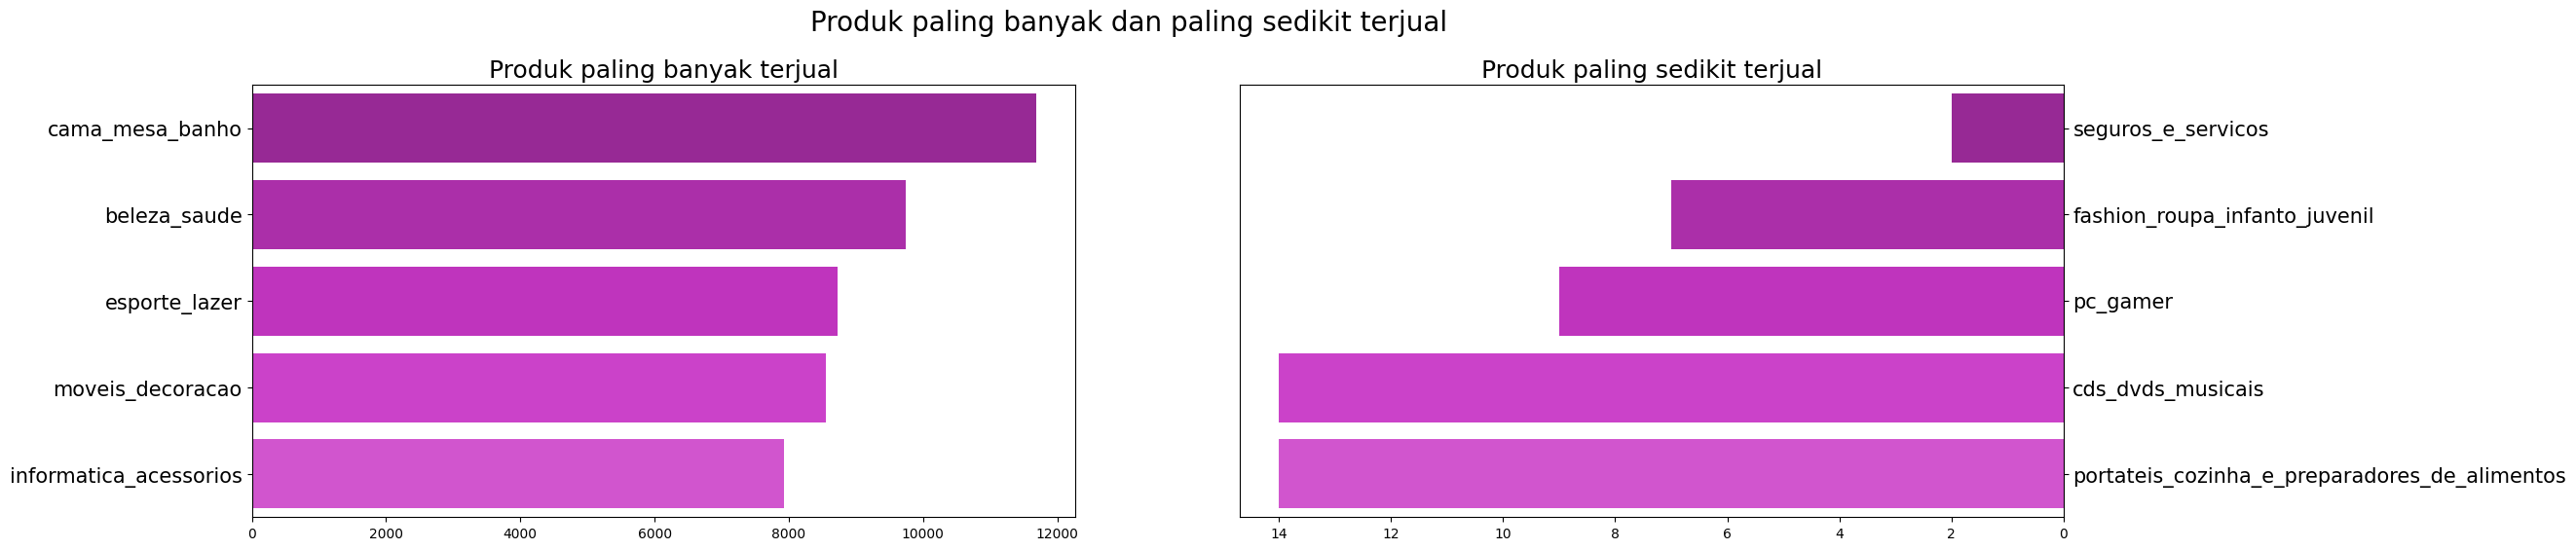

In [123]:
# Menetapkan warna
colors = ["#a917a7", "#c01abd", "#d61dd3", "#e22bdf", "#e541e2"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Grafik pertama: Produk paling banyak terjual
sns.barplot(
    x="product sold", 
    y="product_category_name", 
    data=count_order_items_top.head(5), 
    palette=colors, 
    ax=ax[0], 
    hue="product_category_name",  # Menetapkan y ke hue
    legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Grafik kedua: Produk paling sedikit terjual
sns.barplot(
    x="product sold", 
    y="product_category_name", 
    data=count_order_items_bottom.sort_values(by="product sold", ascending=True).head(5), 
    palette=colors, 
    ax=ax[1], 
    hue="product_category_name",  # Menetapkan y ke hue
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Menambahkan jarak antara judul utama dan subplots
plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.subplots_adjust(top=0.85)  # Menambahkan jarak antara judul dan plot

plt.show()

Kategori produk yang paling banyak terjual adalah cama mesa banho (tempat tidur, meja, kamar mandi), artinya kebanyakan pelanggan belanja keperluan untuk tempat tidur seperti seprai, bantal, dan selimut; untuk meja seperti taplak meja, serbet kain; dan untuk kamar mandi seperti handuk, keset kamar mandi. Kemudian diurutan selanjutnya ada beleza saude (kecantikan dan kesehatan) dan esporte lazer (olahraga dan rekreasi). Ini menunjukkan bahwa pelanggan juga banyak belanja untuk kecantikan seperti makeup, skincare; untuk kesehatan seperti alat pengukur tekanan darah; untuk olahraga seperti bola, raket; dan untuk rekreasi seperti tenda, sleeping bag. 

In [124]:
order_items_revenue_top = (
    all_data.groupby("product_category_name")["price"]  
    .sum()  
    .reset_index()  
    .rename(columns={"price": "revenue"})  
    .sort_values(by="revenue", ascending=False) 
    .head(10)  
)

order_items_revenue_top.head()

,product_category_name,revenue
11,beleza_saude,1267072.48
66,relogios_presentes,1207355.40
13,cama_mesa_banho,1081890.33
32,esporte_lazer,989555.18
44,informatica_acessorios,922482.79


In [125]:
order_items_revenue_bottom = (
    all_data.groupby("product_category_name")["price"]  
    .sum()  
    .reset_index()  
    .rename(columns={"price": "revenue"})  
    .sort_values(by="revenue", ascending=True) 
    .head(10)  
)

order_items_revenue_bottom.head()

,product_category_name,revenue
67,seguros_e_servicos,283.29
37,fashion_roupa_infanto_juvenil,519.95
17,cds_dvds_musicais,730.00
15,casa_conforto_2,734.47
41,flores,1000.24


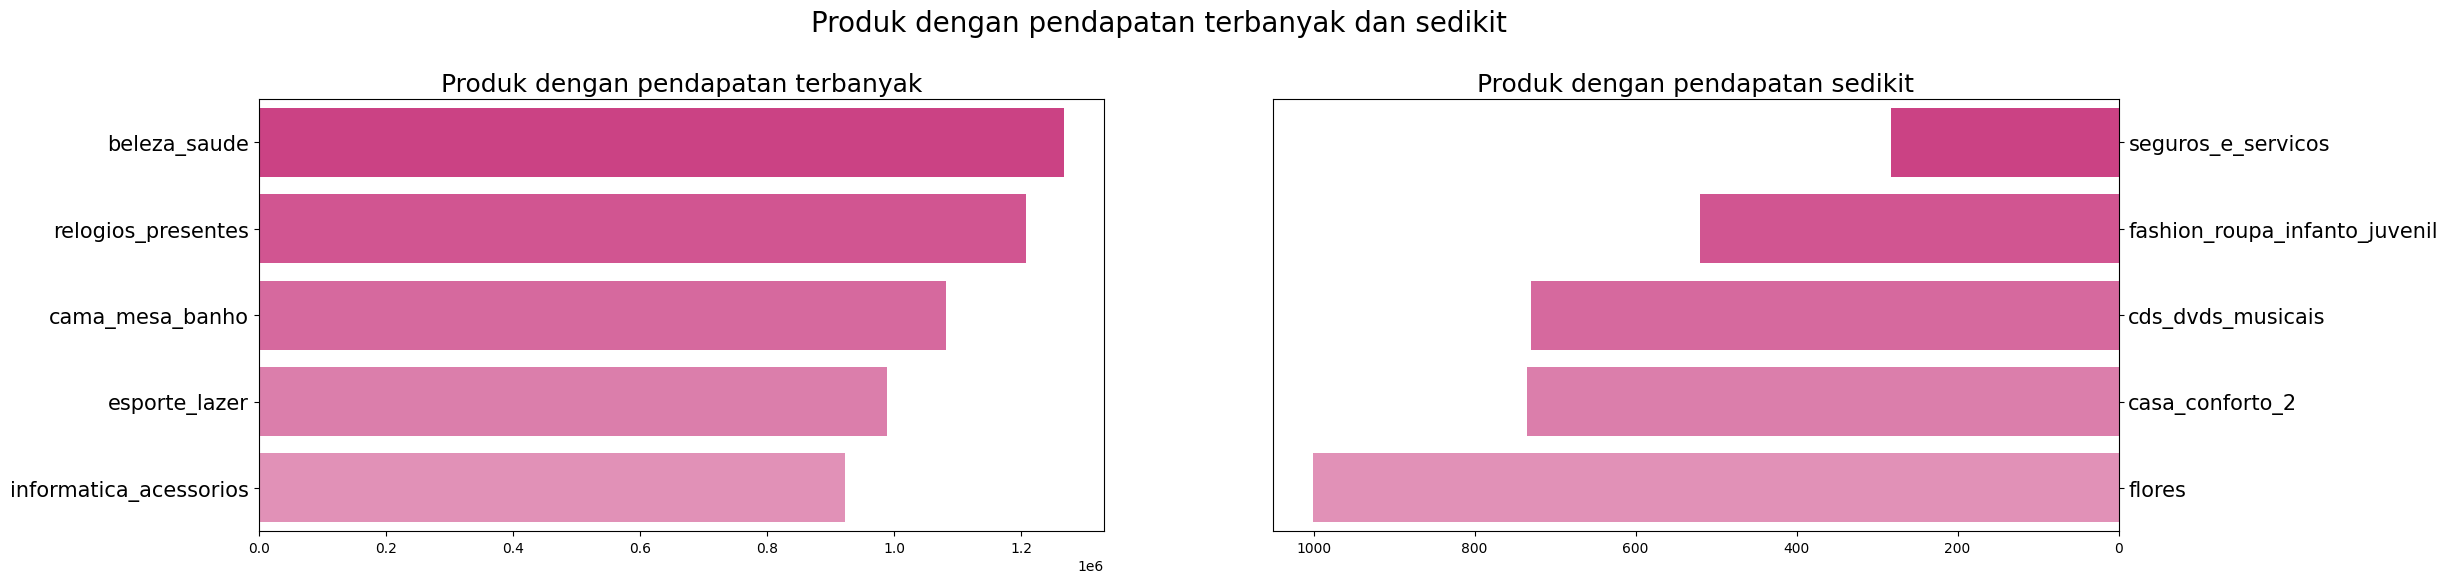

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Menetapkan warna
colors = ["#e22b83", "#e54190", "#e8579d", "#eb6eaa", "#ee84b7"]

# Grafik pertama: Produk paling banyak terjual
sns.barplot(
    x="revenue", 
    y="product_category_name", 
    data=order_items_revenue_top.head(5), 
    palette=colors, 
    ax=ax[0], 
    hue="product_category_name",  # Menetapkan y ke hue
    legend=False
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan pendapatan terbanyak", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Grafik kedua: Produk paling sedikit terjual
sns.barplot(
    x="revenue", 
    y="product_category_name", 
    data=order_items_revenue_bottom.sort_values(by="revenue", ascending=True).head(5), 
    palette=colors, 
    ax=ax[1], 
    hue="product_category_name",  # Menetapkan y ke hue
    legend=False
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan pendapatan sedikit", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk dengan pendapatan terbanyak dan sedikit", fontsize=20)
plt.subplots_adjust(top=0.83)  # Menambahkan jarak antara judul dan plot
plt.show()

Walaupun cama mesa banho (tempat tidur, meja, kamar mandi) menduduki kategori produk yang paling banyak terjual, jumlah pendapatannya itu masih kalah dengan beleza saude (kecantikan dan kesehatan). Bahkan pendapatan kategori cama mesa banho berada di urutan ketiga dibawah beleza saude dan relogios presentes. Hal ini menunjukkan bahwa rata2 harga produk pada kategori beleza saude (kecantikan dan kesehatan) dan relogios presentes (jam tangan dan hadiah) lebih tinggi dibandingkan cama mesa banho (tempat tidur, meja, kamar mandi)

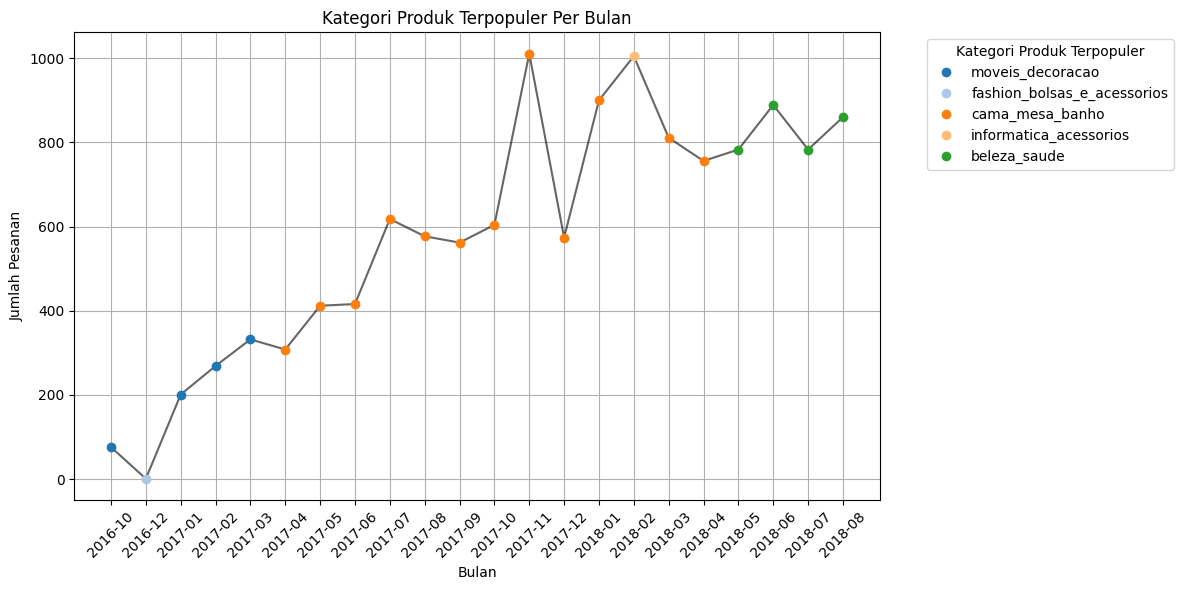

In [127]:
# Pastikan 'order_purchase_timestamp' adalah tipe datetime
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Ekstrak bulan dan tahun dari 'order_purchase_timestamp'
all_data['order_month'] = all_data['order_purchase_timestamp'].dt.to_period('M')

# Urutkan data berdasarkan tanggal (bulan)
all_data = all_data.sort_values(by='order_purchase_timestamp')

# Inisialisasi list untuk menyimpan kategori terpopuler dan jumlah pesanan tiap bulan
top_categories_per_month = []
orders_per_month = []
category_colors = {}

# Loop untuk setiap bulan dan cari kategori terpopuler
for month in all_data['order_month'].unique():
    # Filter data untuk bulan tertentu
    month_data = all_data[all_data['order_month'] == month]
    
    # Kelompokkan berdasarkan kategori produk dan hitung jumlah pesanan
    category_counts = month_data.groupby('product_category_name').size()
    
    # Temukan kategori dengan jumlah pesanan terbanyak di bulan tersebut
    top_category = category_counts.idxmax()
    top_category_count = category_counts.max()
    
    # Simpan kategori terpopuler dan jumlah pesanan bulan tersebut
    top_categories_per_month.append(top_category)
    orders_per_month.append(top_category_count)
    
    # Tentukan warna untuk kategori ini (acak warna jika belum ada)
    if top_category not in category_colors:
        category_colors[top_category] = plt.cm.tab20(len(category_colors) % 20)

# Plot grafik zigzag
plt.figure(figsize=(12, 6))
months_str = [str(month) for month in all_data['order_month'].unique()]

# Plot garis hitam yang menghubungkan titik
plt.plot(months_str, orders_per_month, color='black', linestyle='-', alpha=0.6)

# Plot titik dengan warna berbeda sesuai kategori
for i, month in enumerate(months_str):
    plt.plot(month, orders_per_month[i], 'o', color=category_colors[top_categories_per_month[i]])

# Berikan keterangan untuk warna
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) 
           for color in category_colors.values()]
labels = list(category_colors.keys())

plt.legend(handles=handles, labels=labels, title="Kategori Produk Terpopuler", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.title('Kategori Produk Terpopuler Per Bulan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
# Inisialisasi list untuk menyimpan kategori terpopuler dan jumlah pesanan tiap bulan
top_categories_per_month = []
orders_per_month = []

# Loop untuk setiap bulan dan cari kategori terpopuler
for month in all_data['order_month'].unique():
    # Filter data untuk bulan tertentu
    month_data = all_data[all_data['order_month'] == month]
    
    # Kelompokkan berdasarkan kategori produk dan hitung jumlah pesanan
    category_counts = month_data.groupby('product_category_name').size()
    
    # Temukan kategori dengan jumlah pesanan terbanyak di bulan tersebut
    top_category = category_counts.idxmax()
    top_category_count = category_counts.max()
    
    # Simpan kategori terpopuler dan jumlah pesanan bulan tersebut
    top_categories_per_month.append(top_category)
    orders_per_month.append(top_category_count)

result_df = pd.DataFrame({
    'Bulan': all_data['order_month'].unique().astype(str),
    'Kategori Terpopuler': top_categories_per_month,
    'Jumlah Pesanan': orders_per_month
})

print(result_df)

      Bulan          Kategori Terpopuler  Jumlah Pesanan
0   2016-10             moveis_decoracao              76
1   2016-12  fashion_bolsas_e_acessorios               1
2   2017-01             moveis_decoracao             201
3   2017-02             moveis_decoracao             269
4   2017-03             moveis_decoracao             332
5   2017-04              cama_mesa_banho             308
6   2017-05              cama_mesa_banho             412
7   2017-06              cama_mesa_banho             416
8   2017-07              cama_mesa_banho             618
9   2017-08              cama_mesa_banho             577
10  2017-09              cama_mesa_banho             562
11  2017-10              cama_mesa_banho             604
12  2017-11              cama_mesa_banho            1011
13  2017-12              cama_mesa_banho             574
14  2018-01              cama_mesa_banho             900
15  2018-02       informatica_acessorios            1005
16  2018-03              cama_m

#### Berkaitan dengan pertanyaan : Di mana saja persebaran lokasi pelanggan dengan konsentrasi pembelian tertinggi dan dan penjual dengan volume transaksi tertinggi?

In [129]:
geolocation_subset = geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

# Hitung jumlah pembelian per kode pos pelanggan
customer_agg = all_data.groupby('customer_zip_code_prefix').size().reset_index(name='purchase_count')

# Hitung jumlah transaksi per kode pos penjual
seller_agg = all_data.groupby('seller_zip_code_prefix').size().reset_index(name='transaction_count')

# Gabungkan dengan data geolokasi
customer_locations = pd.merge(
    customer_agg, geolocation_subset,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

seller_locations = pd.merge(
    seller_agg, geolocation_subset,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

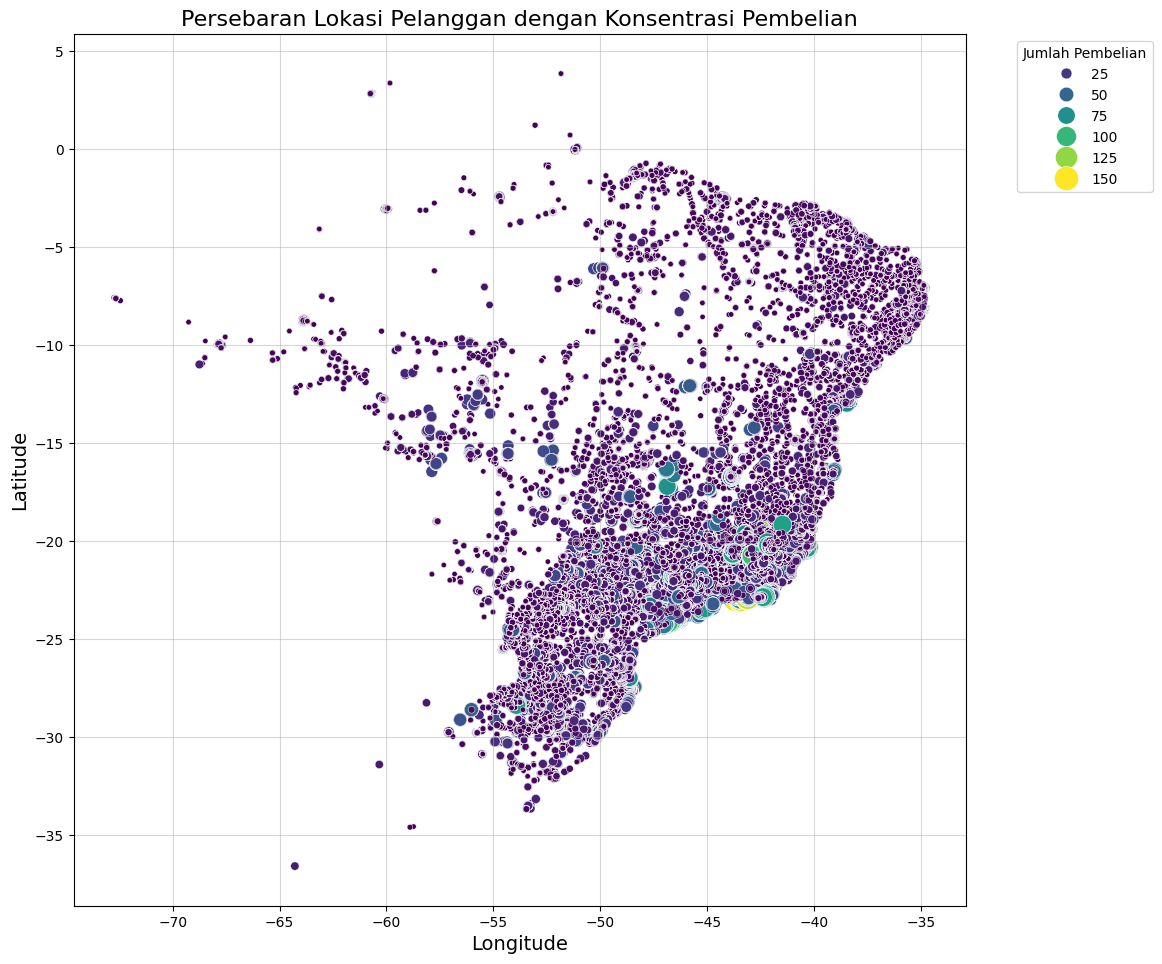

In [130]:
customer_locations_filtered = customer_locations[
    (customer_locations['geolocation_lat'] < 10) & 
    (customer_locations['geolocation_lat'] > -40) & 
    (customer_locations['geolocation_lng'] < -30) & 
    (customer_locations['geolocation_lng'] > -75)
]
plt.figure(figsize=(12, 10))
scatter1 = sns.scatterplot(
    x='geolocation_lng', y='geolocation_lat',
    size='purchase_count', sizes=(15, 300),  # Perbesar range ukuran bubble
    hue='purchase_count', palette='viridis',
    data=customer_locations_filtered, legend='brief'
)
scatter1.legend(title='Jumlah Pembelian', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Persebaran Lokasi Pelanggan dengan Konsentrasi Pembelian', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.tight_layout(pad=2)  # Tambahkan padding untuk margin
plt.grid(alpha=0.5)  # Tambahkan grid untuk membantu visualisasi lokasi
plt.show()

Sebagian besar pelanggan terkonsentrasi di bagian tenggara wilayah yang dipetakan, dengan beberapa titik berwarna lebih terang yang menunjukkan area dengan jumlah pembelian lebih tinggi. Kota-kota di sekitar São Paulo, Rio de Janeiro, dan Minas Gerais mungkin merupakan kontributor utama untuk konsentrasi pembelian ini. Penyebaran pelanggan relatif luas, namun titik-titik dengan intensitas warna yang lebih besar menunjukkan adanya pusat aktivitas pembelian yang lebih signifikan. Hal ini mengindikasikan bahwa daerah-daerah tertentu memiliki lebih banyak transaksi pelanggan dibandingkan daerah lainnya. Sedangkan daerah dengan lebih sedikit titik konsentrasi mungkin merupakan peluang untuk memperluas pasar atau mengidentifikasi hambatan logistik yang membatasi akses pelanggan di sana.

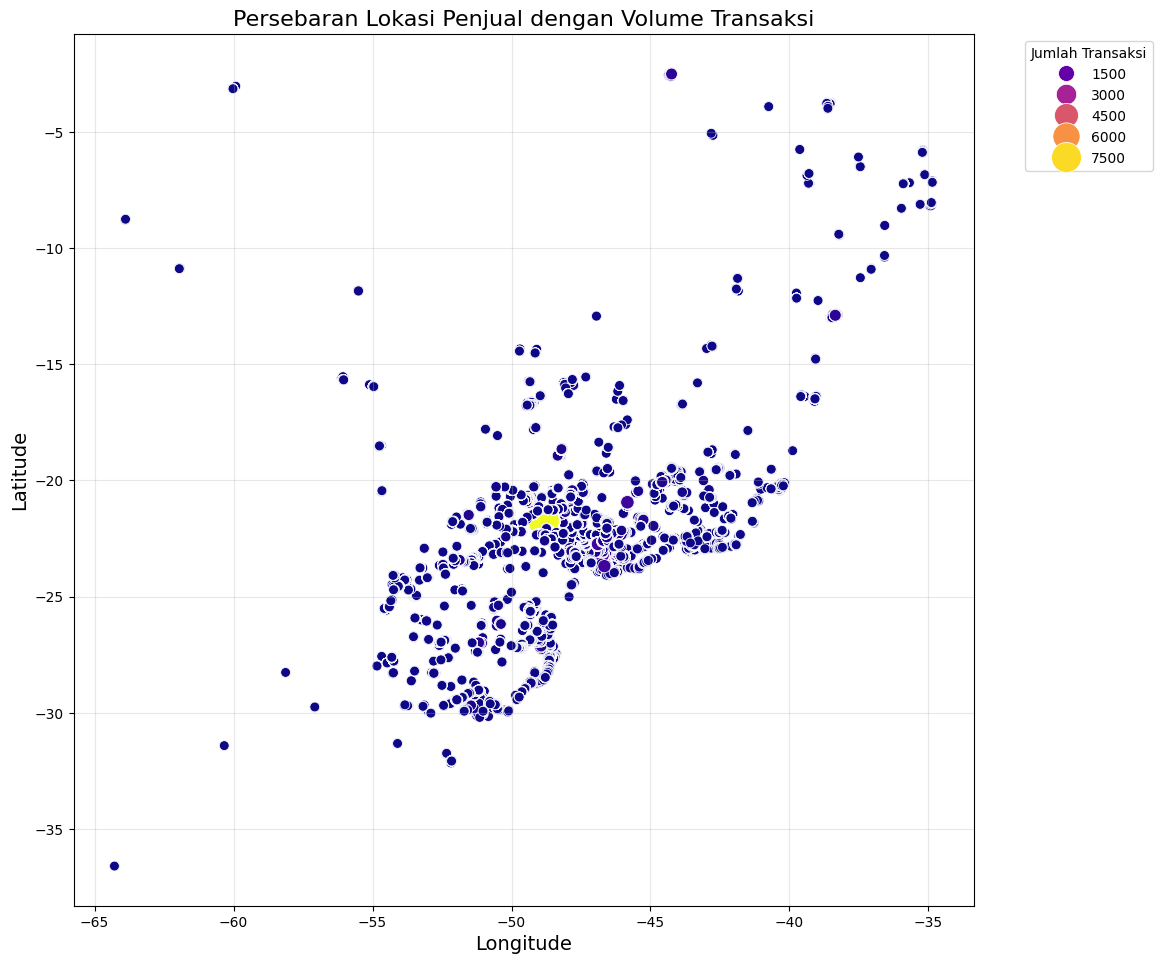

In [131]:
seller_locations_filtered = seller_locations[
    (seller_locations['geolocation_lat'] < 10) & 
    (seller_locations['geolocation_lat'] > -40) & 
    (seller_locations['geolocation_lng'] < -30) & 
    (seller_locations['geolocation_lng'] > -75)
]
plt.figure(figsize=(12, 10))
scatter2 = sns.scatterplot(
    x='geolocation_lng', y='geolocation_lat',
    size='transaction_count', sizes=(50, 500),  # Bubble lebih besar
    hue='transaction_count', palette='plasma',  # Warna yang mencolok
    data=seller_locations_filtered, legend='brief'
)
scatter2.legend(title='Jumlah Transaksi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Persebaran Lokasi Penjual dengan Volume Transaksi', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.tight_layout(pad=2)  # Tambahkan margin untuk elemen visual
plt.grid(alpha=0.3)  # Grid untuk membantu membaca posisi
plt.show()


Penjual lebih terkonsentrasi di wilayah tenggara Brazil, dengan jumlah transaksi tertinggi di wilayah metropolitan yang besar. Titik dengan warna lebih terang menunjukkan area dengan volume transaksi yang sangat tinggi, menunjukkan adanya klaster penjual aktif di wilayah tersebut. Konsentrasi penjual dan transaksi di wilayah tenggara mendukung efisiensi logistik, tetapi area di luar klaster utama dapat memiliki tantangan distribusi yang lebih besar.

#### Berkaitan dengan pertanyaan: Kapan pelanggan biasanya melakukan pembelian?

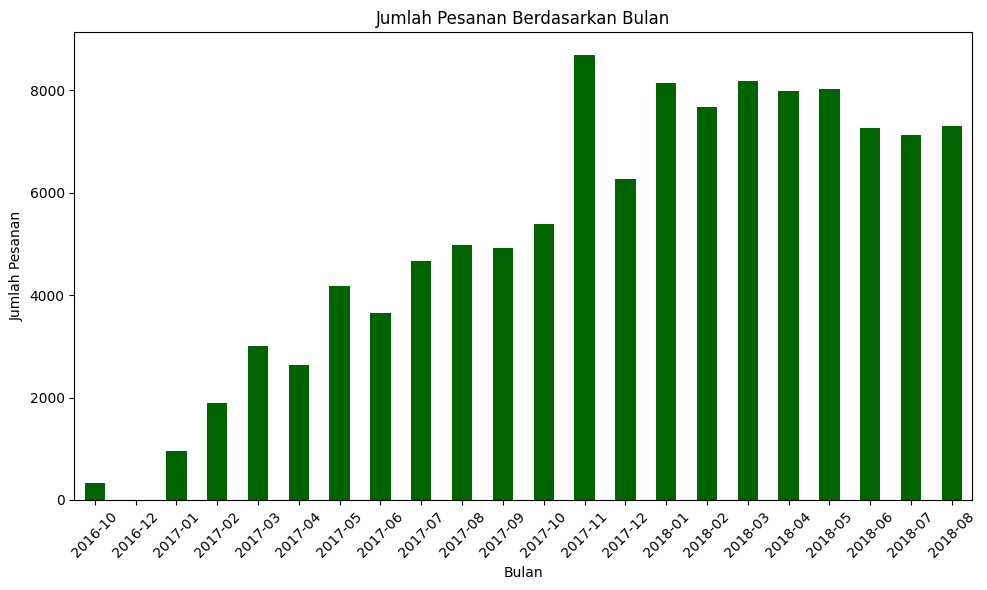

In [132]:
# Hitung jumlah pesanan berdasarkan bulan
orders_by_month = all_data['order_month'].value_counts().sort_index()

# Plotkan grafik
plt.figure(figsize=(10, 6))
orders_by_month.plot(kind='bar', color='darkgreen')
plt.title('Jumlah Pesanan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [142]:
all_data.groupby(by="order_month").order_id.count().sort_values(ascending=False)

order_month
2017-11    8692
2018-03    8184
2018-01    8146
2018-05    8019
2018-04    7987
2018-02    7671
2018-08    7300
2018-06    7262
2018-07    7124
2017-12    6261
2017-10    5382
2017-08    4973
2017-09    4920
2017-07    4666
2017-05    4174
2017-06    3640
2017-03    3010
2017-04    2625
2017-02    1890
2017-01     955
2016-10     334
2016-12       1
Freq: M, Name: order_id, dtype: int64

Lonjakan pesanan terjadi pada November 2017, kemungkinan karena adanya event belanja besar seperti Black Friday atau Harbolnas. Tren peningkatan juga terlihat pada awal tahun 2018, dengan bulan Januari hingga Mei mencatat volume pesanan tinggi, menunjukkan adanya peningkatan aktivitas belanja pasca liburan dan awal tahun. Namun, terdapat fluktuasi di pertengahan tahun yang menandakan musim belanja yang lebih rendah.

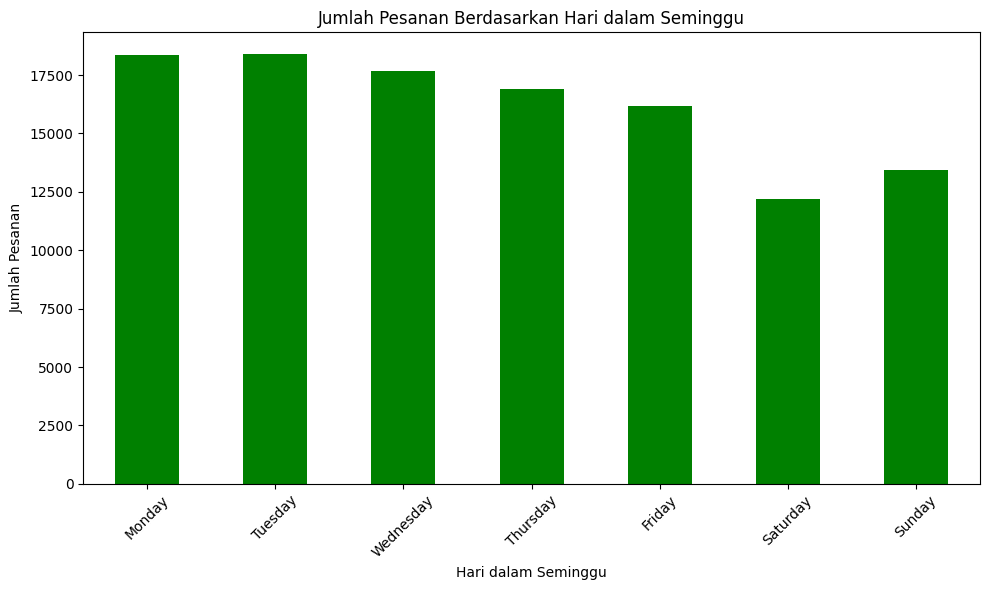

In [133]:
# Pastikan 'order_purchase_timestamp' adalah tipe datetime
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Tambahkan kolom untuk hari dalam seminggu
all_data['day_of_week'] = all_data['order_purchase_timestamp'].dt.day_name()

# Tentukan urutan hari dalam seminggu dimulai dari Senin
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Hitung jumlah pesanan berdasarkan hari dalam seminggu
orders_by_day = all_data['day_of_week'].value_counts()[day_order]

# Plotkan grafik
plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='bar', color='green')
plt.title('Jumlah Pesanan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
all_data.groupby(by="day_of_week").order_id.count().sort_values(ascending=False)

day_of_week
Tuesday      18407
Monday       18375
Wednesday    17674
Thursday     16908
Friday       16193
Sunday       13450
Saturday     12209
Name: order_id, dtype: int64

Jumlah pesanan paling tinggi terjadi pada hari Senin hingga Rabu, lalu secara bertahap menurun pada hari Kamis dan Jumat. Akhir pekan, terutama hari Sabtu, mengalami jumlah pesanan yang lebih rendah dibandingkan hari kerja, meskipun terjadi sedikit peningkatan kembali pada hari Minggu. ni mengindikasikan bahwa pelanggan lebih aktif berbelanja di awal dan pertengahan minggu, sementara akhir pekan mungkin lebih banyak digunakan untuk kegiatan lain di luar belanja online.

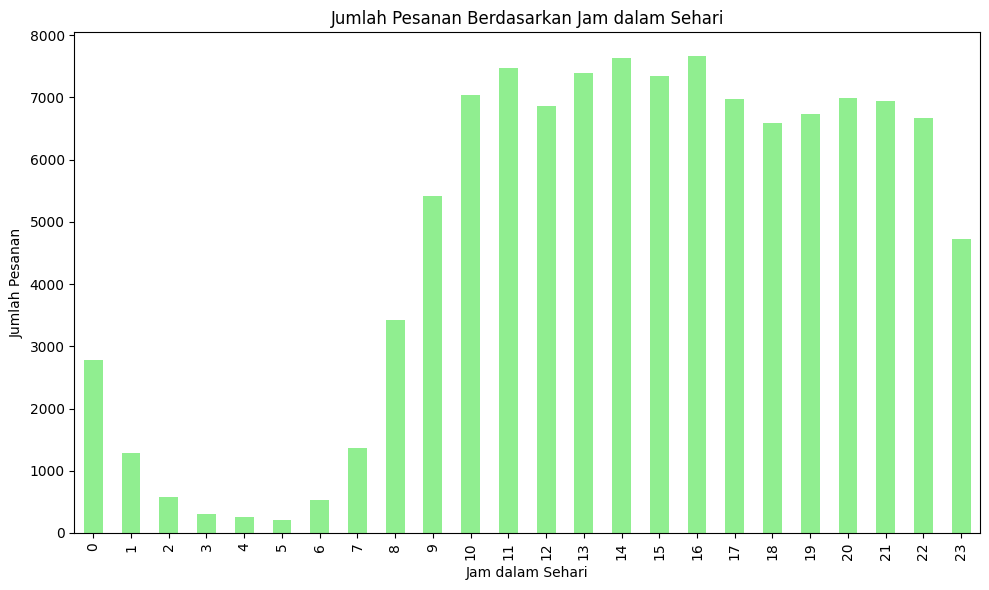

In [135]:
# Tambahkan kolom untuk jam dalam sehari
all_data['hour_of_day'] = all_data['order_purchase_timestamp'].dt.hour

# Hitung jumlah pesanan berdasarkan jam dalam sehari
orders_by_hour = all_data['hour_of_day'].value_counts().sort_index()

# Plotkan grafik
plt.figure(figsize=(10, 6))
orders_by_hour.plot(kind='bar', color='lightgreen')
plt.title('Jumlah Pesanan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pesanan')
plt.tight_layout()
plt.show()

In [136]:
all_data.groupby(by="hour_of_day").order_id.count().sort_values(ascending=False)

hour_of_day
16    7664
14    7634
11    7478
13    7401
15    7343
10    7045
20    6990
17    6979
21    6945
12    6861
19    6729
22    6671
18    6590
9     5415
23    4732
8     3428
0     2781
7     1363
1     1285
2      586
6      537
3      302
4      249
5      208
Name: order_id, dtype: int64

Jumlah pesanan cenderung sangat rendah pada dini hari (00:00 - 06:00) dan mulai meningkat signifikan setelah pukul 07:00. Puncak pesanan terjadi pada rentang waktu 10:00 hingga 16:00, yang menunjukkan bahwa pelanggan cenderung berbelanja pada siang hari. Setelah pukul 16:00, jumlah pesanan masih relatif tinggi tetapi mulai menurun perlahan setelah pukul 20:00.

#### Berkaitan dengan pertanyaan: Apakah biaya pengiriman meningkat seiring dengan bertambahnya berat produk?

In [137]:
weight_by_freight = (
    all_data.groupby("freight_value")["product_weight_g"]  
    .sum()  
    .reset_index()  
    .rename(columns={"product_weight_g": "product weight"})  
    .sort_values(by="product weight", ascending=True) 
)

weight_by_freight.head(10)

,freight_value,product weight
68,1.27,50.0
50,0.98,50.0
4597,51.23,50.0
4263,46.82,75.0
458,6.79,88.0
4700,52.79,100.0
3567,38.69,100.0
4620,51.50,100.0
413,6.22,100.0
24,0.34,100.0


Korelasi antara Berat Produk dan Biaya Pengiriman:
                  product_weight_g  freight_value
product_weight_g          1.000000       0.611878
freight_value             0.611878       1.000000


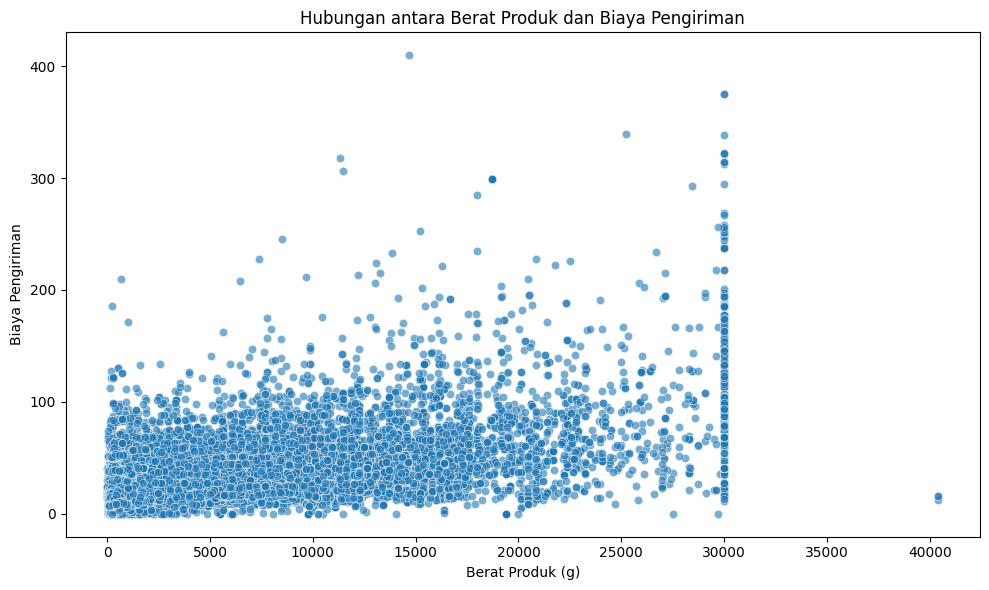

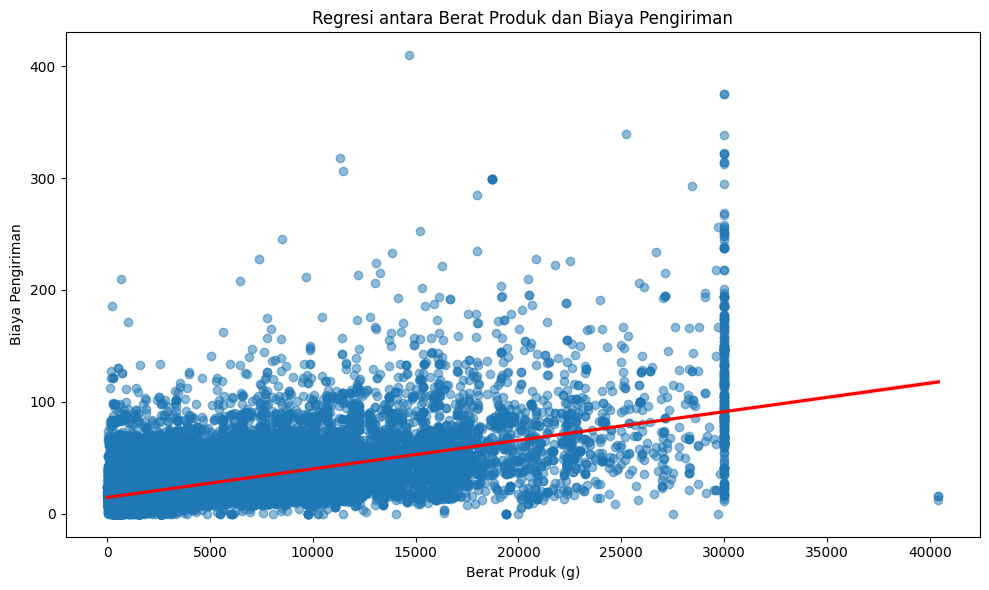

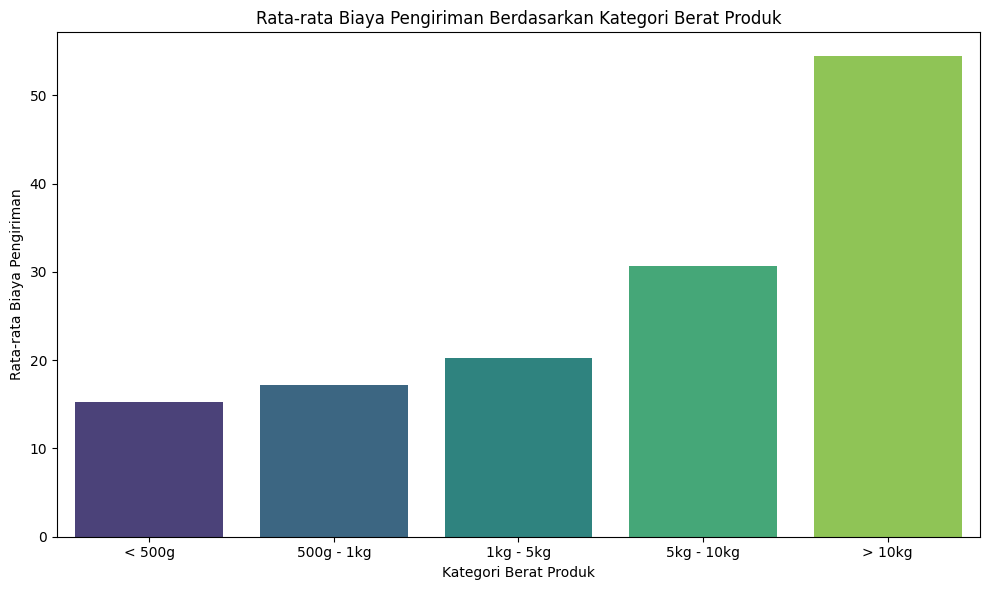

In [138]:
# Memeriksa korelasi antara berat produk dan biaya pengiriman
correlation = all_data[['product_weight_g', 'freight_value']].corr()
print("Korelasi antara Berat Produk dan Biaya Pengiriman:")
print(correlation)

# Visualisasi scatterplot untuk hubungan antara berat produk dan biaya pengiriman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_weight_g', y='freight_value', data=all_data, alpha=0.6)
plt.title('Hubungan antara Berat Produk dan Biaya Pengiriman')
plt.xlabel('Berat Produk (g)')
plt.ylabel('Biaya Pengiriman')
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()

# Membuat plot regresi untuk melihat hubungan linear
plt.figure(figsize=(10, 6))
sns.regplot(x='product_weight_g', y='freight_value', data=all_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regresi antara Berat Produk dan Biaya Pengiriman')
plt.xlabel('Berat Produk (g)')
plt.ylabel('Biaya Pengiriman')
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()

# Menentukan kategori berat produk
bins = [0, 500, 1000, 5000, 10000, float('inf')]  # Rentang berat dalam gram
labels = ['< 500g', '500g - 1kg', '1kg - 5kg', '5kg - 10kg', '> 10kg']
all_data['weight_category'] = pd.cut(all_data['product_weight_g'], bins=bins, labels=labels)

# Menghitung rata-rata biaya pengiriman berdasarkan kategori berat dengan observed=False
weight_category_freight = all_data.groupby('weight_category', observed=False)['freight_value'].mean().reset_index()

# Visualisasi rata-rata biaya pengiriman per kategori berat
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weight_category', 
    y='freight_value', 
    hue='weight_category',  # Tetapkan variabel x ke hue
    data=weight_category_freight, 
    palette='viridis', 
    dodge=False,  # Hindari pemisahan kategori
    legend=False  # Nonaktifkan legend
)
plt.title('Rata-rata Biaya Pengiriman Berdasarkan Kategori Berat Produk')
plt.xlabel('Kategori Berat Produk')
plt.ylabel('Rata-rata Biaya Pengiriman')
plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()


Ada kecenderungan positif antara berat produk dan biaya pengiriman. Meskipun ada variasi yang cukup besar, produk yang lebih berat cenderung memiliki biaya pengiriman yang lebih tinggi. Ini mencerminkan korelasi positif yang moderat, dengan nilai korelasi sekitar 0.61 antara berat produk dan biaya pengiriman, yang berarti semakin berat produk, semakin tinggi biaya pengirimannya. Untuk kategori produk dengan berat < 500g memiliki biaya pengiriman yang relatif rendah, kurang dari 10. Produk dengan berat 500g - 1kg, 1kg - 5kg, dan 5kg - 10kg memiliki biaya pengiriman yang semakin meningkat, dengan produk yang lebih berat membawa biaya pengiriman yang lebih tinggi. Terakhir untuk produk dengan berat lebih dari 10kg adalah kategori dengan biaya pengiriman yang paling tinggi, mencapai lebih dari 50, yang mencerminkan biaya pengiriman yang sangat mahal untuk produk berat.

#### Berkaitan dengan pertanyaan: Bagaimana tingkat kepuasan pelanggan berdasarkan metode pembayaran?

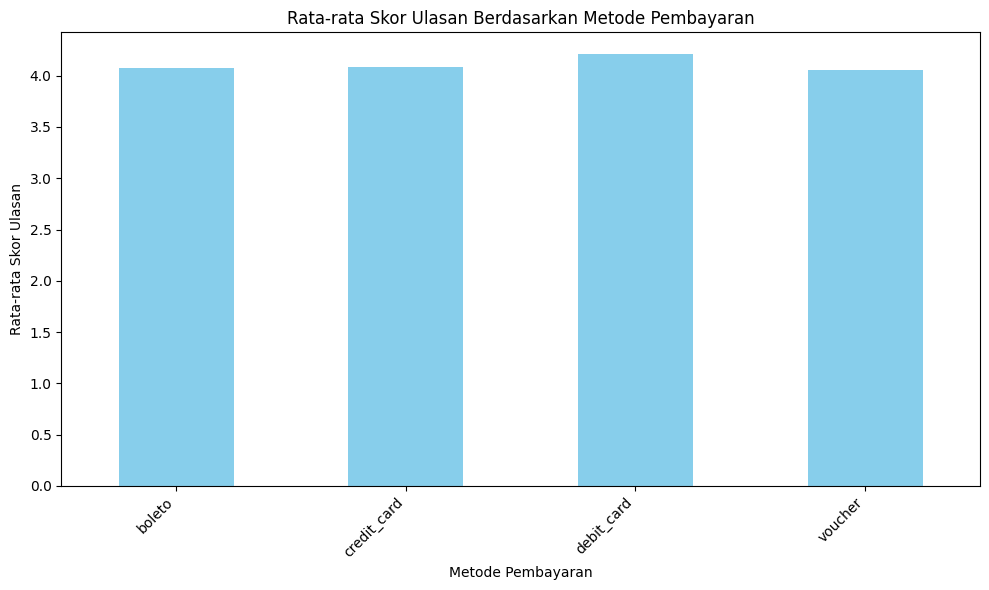

In [139]:
avg_review_score = all_data.groupby('payment_type')['review_score'].mean()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
avg_review_score.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Skor Ulasan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Skor Ulasan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [140]:
all_data.groupby(by="payment_type").review_score.mean().sort_values(ascending=False)

payment_type
debit_card     4.212177
credit_card    4.083093
boleto         4.076106
voucher        4.060103
Name: review_score, dtype: float64

Debit Card menunjukkan skor ulasan tertinggi, dengan rata-rata 4.21. Ini mengindikasikan bahwa pelanggan yang menggunakan metode pembayaran ini cenderung merasa lebih puas dibandingkan dengan metode pembayaran lainnya. Hal ini bisa terkait dengan kenyamanan atau kemudahan transaksi menggunakan kartu debit, yang mungkin memberikan pengalaman belanja yang lebih mulus.

Credit Card, Boleto, dan Voucher memiliki skor ulasan yang lebih rendah, meskipun perbedaannya tidak signifikan (berada di sekitar 4.08 - 4.06). Skor yang sedikit lebih rendah ini bisa menunjukkan bahwa ada beberapa kendala atau ketidaknyamanan yang dirasakan pelanggan saat menggunakan metode pembayaran ini. Misalnya, dengan Boleto, proses pembayaran mungkin memerlukan waktu lebih lama dan tidak langsung seperti debit atau kredit card, yang bisa mempengaruhi pengalaman pelanggan.

Voucher, meskipun sering digunakan dalam berbagai promosi atau diskon, memiliki skor ulasan sedikit lebih rendah (4.06). Hal ini mungkin menunjukkan bahwa pelanggan merasa sedikit lebih terbatas dalam hal penggunaan atau ada kebingungan terkait cara penggunaannya.

#### Berkaitan dengan pertanyaan : Bagaimana distribusi pelanggan berdasarkan lama waktu pengirimannya?

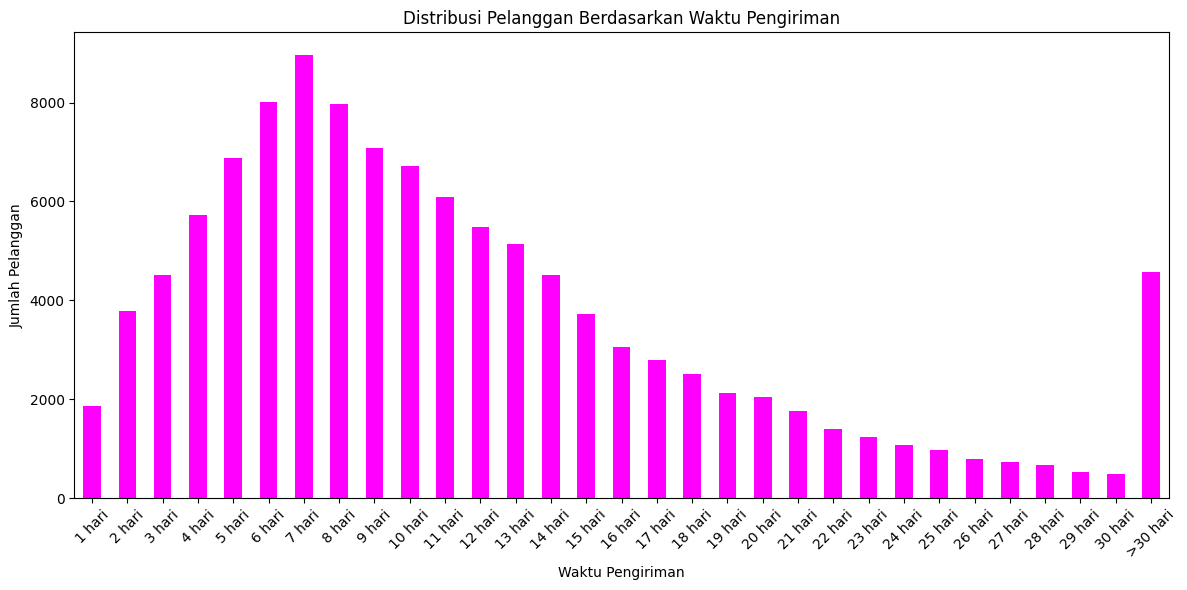

In [141]:
# Mengubah kolom 'order_purchase_timestamp' dan 'order_delivered_customer_date' menjadi tipe datetime
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
all_data['order_delivered_customer_date'] = pd.to_datetime(all_data['order_delivered_customer_date'])

# Menghitung durasi pengiriman (selisih antara waktu pengiriman dan waktu pembelian)
all_data['delivery_duration'] = (all_data['order_delivered_customer_date'] - all_data['order_purchase_timestamp']).dt.days

# Mengategorikan durasi pengiriman dengan angka 1, 2, 3, ..., dan >30 hari
bins = list(range(1, 32)) + [float('inf')]  # Kategori: 1 hari, 2 hari, ..., 30 hari, >30 hari
labels = [str(i) + ' hari' for i in range(1, 31)] + ['>30 hari']  # 30 labels untuk 1-30 hari, dan 1 label untuk >30 hari

# Membuat kolom kategori durasi pengiriman
all_data['delivery_duration_category'] = pd.cut(all_data['delivery_duration'], bins=bins, labels=labels, right=False)

# Visualisasi distribusi durasi pengiriman
plt.figure(figsize=(12, 6))
all_data['delivery_duration_category'].value_counts().sort_index().plot(kind='bar', color='magenta')

# Menambahkan label dan judul
plt.title('Distribusi Pelanggan Berdasarkan Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

Mayoritas pelanggan menerima pesanan mereka dalam rentang 3 hingga 10 hari, dengan puncaknya terjadi pada hari ke-7. Hal ini menunjukkan bahwa waktu pengiriman standar untuk e-commerce yang dianalisis cenderung berada dalam kisaran tersebut. Setelah hari ke-10, jumlah pelanggan yang menerima pesanan mulai menurun secara bertahap, yang dapat mengindikasikan bahwa sebagian kecil pelanggan mengalami keterlambatan dalam pengiriman. Menariknya, terdapat lonjakan signifikan pada kategori pengiriman yang melebihi 30 hari, yang mungkin disebabkan oleh faktor seperti pengiriman internasional, masalah logistik, atau kendala dalam proses distribusi. Selain itu, meskipun sebagian besar pelanggan mendapatkan barang dalam waktu relatif cepat, ada kelompok kecil yang menerima pesanan mereka setelah lebih dari 20 hari, yang berpotensi menurunkan tingkat kepuasan pelanggan.

## Conclusion

#### Conclusion Pertanyaan 'Apa kategori produk yang paling banyak terjual?'

Kategori produk yang paling banyak terjual adalah cama mesa banho, kemudian diurutan selanjutnya ada beleza saude dan esporte_lazer. Tetapi cama mesa banho bukanlah kategori produk yang memiliki pendapatan tertinggi, karena ternyata beleza saude menduduki kategori dengan pendapatan tertinggi. Bahkan cama mesa banho berada di urutan ketiga setelah beleza saude dan relogios presentes. Memang kategori kecantikan dan kesehatan sering kali memiliki nilai jual yang lebih tinggi, seperti kosmetik premium, skincare, atau alat kesehatan. Di sisi lain jumlah unit terjual bukan satu-satunya faktor penentu pendapatan karena kategori rumah tangga untuk tempat tidur, meja, dan kamar mandi seringkali memiliki produk-produk dengan harga rendah bila dibandingkan dengan kategori kecantikan dan kesehatan, artinya pendapatan kategori rumah tangga juga akan lebih kecil meskipun volume penjualan tinggi. Jadi, keberhasilan kategori dalam penjualan tidak hanya ditentukan oleh volume (jumlah produk terjual), tetapi juga oleh nilai atau harga rata-rata produk di kategori tersebut. Kategori beleza saude menunjukkan keuntungan lebih besar karena memiliki produk dengan harga atau margin lebih tinggi meskipun volume penjualannya lebih sedikit.

#### Conclusion Pertanyaan 'Di mana saja persebaran lokasi pelanggan dengan konsentrasi pembelian tertinggi dan dan penjual dengan volume transaksi tertinggi?'

Wilayah tenggara Brazil menjadi pusat utama aktivitas pelanggan dan penjual. Sebagian besar pembelian terkonsentrasi di wilayah ini, terutama di sekitar São Paulo, Rio de Janeiro, dan Minas Gerais, yang menunjukkan potensi pasar yang sangat besar di kawasan tersebut. Penjual juga menunjukkan konsentrasi serupa, dengan volume transaksi tertinggi di wilayah metropolitan, mendukung efisiensi logistik dan distribusi. Korelasi antara lokasi pelanggan dengan pembelian tinggi dan lokasi penjual dengan transaksi tinggi menunjukkan sinergi geografis yang kuat. Sementara itu, area dengan konsentrasi rendah pada kedua peta dapat menjadi peluang untuk ekspansi pasar atau peningkatan aksesibilitas logistik.

#### Conclusion Pertanyaan 'Kapan pelanggan biasanya melakukan pembelian?'

Pelanggan biasanya melakukan pembelian pada beberapa periode waktu tertentu. Jika dilihat dari pola harian, jumlah pesanan mulai meningkat signifikan dari pukul 08.00 pagi dan mencapai puncaknya pada rentang pukul 10.00 hingga 16.00, kemudian masih tetap tinggi hingga malam hari sebelum menurun setelah pukul 22.00. Ini menunjukkan bahwa mayoritas pelanggan cenderung melakukan transaksi pada jam kerja dan menjelang malam.

Dari segi pola mingguan, pembelian cenderung lebih tinggi pada hari Senin hingga Rabu, kemudian mulai menurun menjelang akhir pekan, dengan jumlah pesanan paling rendah terjadi pada hari Sabtu. Hal ini mengindikasikan bahwa pelanggan lebih aktif berbelanja di awal dan pertengahan minggu dibandingkan akhir pekan.

Jika dilihat berdasarkan bulan dalam setahun, November adalah bulan dengan jumlah pesanan tertinggi, diikuti oleh Maret, Januari, Mei, dan April. Pola ini kemungkinan besar dipengaruhi oleh event belanja besar seperti Black Friday atau Harbolnas pada bulan November serta kebiasaan belanja awal tahun di bulan Januari. Sebaliknya, bulan dengan jumlah pesanan lebih rendah adalah Februari, Juli, dan Agustus.

Dengan demikian strategi promosi sebaiknya difokuskan pada jam-jam dengan jumlah pesanan tinggi, seperti pagi hingga sore hari, serta pada awal dan pertengahan minggu untuk memaksimalkan konversi penjualan. Selain itu, momen akhir tahun seperti November perlu dimanfaatkan dengan kampanye promosi yang agresif untuk menarik lebih banyak pelanggan. Bulan-bulan dengan volume pesanan rendah, seperti pertengahan tahun dan akhir pekan, dapat menjadi peluang untuk meningkatkan penjualan melalui diskon atau penawaran eksklusif. 

#### Conclusion Pertanyaan 'Apakah biaya pengiriman meningkat seiring dengan bertambahnya berat produk?'

Biaya pengiriman memang cenderung meningkat seiring dengan bertambahnya berat produk. Produk yang lebih ringan (misalnya kurang dari 500g) memiliki biaya pengiriman yang lebih rendah, sementara produk yang lebih berat (di atas 10kg) memerlukan biaya pengiriman yang jauh lebih tinggi. Korelasi positif yang moderat antara berat produk dan biaya pengiriman pada scatter plot menunjukkan bahwa berat produk adalah faktor penting dalam menentukan biaya pengiriman.

#### Conclusion Pertanyaan 'Bagaimana tingkat kepuasan pelanggan berdasarkan metode pembayaran?'

Tingkat kepuasan pelanggan cenderung lebih tinggi untuk pelanggan yang menggunakan Debit Card. Sementara itu, metode pembayaran seperti Credit Card, Boleto, dan Voucher memiliki skor yang lebih rendah meskipun perbedaannya tidak terlalu besar. Penurunan sedikit pada skor ulasan bisa jadi disebabkan oleh faktor kenyamanan transaksi, waktu pemrosesan pembayaran, atau pengalaman terkait penggunaan metode pembayaran tersebut.

Untuk memperbaiki kepuasan pelanggan, terutama bagi yang menggunakan Boleto atau Voucher, mungkin perusahaan dapat mempertimbangkan untuk memberikan penjelasan yang lebih jelas atau menawarkan proses pembayaran yang lebih cepat dan lebih langsung. Penawaran yang diberikan bisa dengan memberikan voucher atau cashback untuk metode pembayaran yang masih sedikit digunakan pelanggan atau yang dapat memberikan keuntungan bagi perusahaan.

#### Conclusion Pertanyaan 'Bagaimana distribusi pelanggan berdasarkan lama waktu pengirimannya?'

Mayoritas pelanggan menerima pesanan dalam waktu kurang dari 10 hari, sehingga e-commerce dapat mengoptimalkan strategi logistik untuk mempertahankan atau mempercepat waktu pengiriman dalam rentang ini. Lonjakan pada kategori pengiriman lebih dari 30 hari perlu dianalisis lebih lanjut untuk mengidentifikasi penyebabnya dan mencari solusi guna mengurangi keterlambatan. Selain itu, peningkatan komunikasi mengenai estimasi waktu pengiriman serta pemberian insentif bagi pengiriman lebih cepat dapat menjadi strategi untuk meningkatkan kepuasan pelanggan dan loyalitas terhadap platform.